<a href="https://colab.research.google.com/github/kushwanth22/FintechCreditRiskModel/blob/main/CreditRiskColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NOTE BOOK COVERS


1. Understand the requirement/Problem statement
2. Preprocessing
3. EDA
4. Imputation
5. Standardization
6. Encodings
7. Pipeline
8. Models
9. Finetune
10. cross validation
11. Grids
12. Pickling
13. stacking
14. voting
15. streamlit Create UI and link
16. Deployment

### 1. Understand the requirement/Problem statement


Credit Risk in Fintech Industry. You are required to build and train a model that identifies Fully Paid and Charged-off loans from the loan dataset.
Task:
Your task is to build this model based on the details in this document and submit it.


Consider these Factors before building the Models:
1.	Use the specific source or dataset for assess credit risk shared with you
2.	What is your intended data split ratio for training, validation, and test sets for the loan dataset? How do you plan to ensure randomness in this split?
3.	Do you plan to explore the importance of these components further?
4.	Do you anticipate class imbalance in the 'loan_status' feature, where
Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. Client has defaulted on the loan
If so, how will you address this imbalance?
5.	Will you normalize the features? If yes, what normalization techniques do you have in mind?
6.	Do you intend to perform data preprocessing tasks such as outlier detection, missing value handling, or feature selection before training your model.

### 2. Preprocessing

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv("./data/train_loan_data.csv")

In [30]:
data # to see sample data

addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0         Jul-1997  10+ years   
1             CA     40000.0         Apr-1987  10+ years   
2             FL     60000.0         Aug-2007  10+ years   
3             IL    100742.0         Sep-1980  10+ years   
4             MD     80000.0         Jul-1999  10+ years   
...          ...         ...              ...        ...   
39991         TX     48000.0         Nov-1995    4 years   
39992         HI    120000.0         Apr-2000  10+ years   
39993         UT     40000.0         Jan-2007    4 years   
39994         VT     42000.0         Jun-1985  10+ years   
39995         KY     25000.0         Apr-2007     1 year   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy            744.0           740.0     E   
1      Department of Veterans Affairs            724.0           720.0     B   
2                    Marble polishing            679.0           675.0     B   
3                             printer            664.0           660.0     B   
4                       Southern Mgmt            669.0           665.0     F   
...                               ...              ...             ...   ...   
39991                             SSR            674.0           670.0     E   
39992                             CTO            769.0           765.0     B   
39993                Escrow Assistant            724.0           720.0     B   
39994       Quality Assurance Manager            729.0           725.0     B   
39995                 Factory worker             664.0           660.0     C   

      home_ownership application_type  ... pub_rec_bankruptcies  \
0           MORTGAGE       Individual  ...                  0.0   
1               RENT       Individual  ...                  0.0   
2           MORTGAGE       Individual  ...                  0.0   
3           MORTGAGE       Individual  ...                  0.0   
4               RENT       Individual  ...                  0.0   
...              ...              ...  ...                  ...   
39991           RENT       Individual  ...                  0.0   
39992       MORTGAGE       Individual  ...                  0.0   
39993            OWN       Individual  ...                  0.0   
39994            OWN       Individual  ...                  0.0   
39995       MORTGAGE       Individual  ...                  0.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
0      debt_consolidation     5338.0        93.6         E1   60 months   
1      debt_consolidation    19944.0        60.3         B1   36 months   
2      debt_consolidation    23199.0        88.5         B5   36 months   
3      debt_consolidation    18425.0        69.0         B2   36 months   
4      debt_consolidation    34370.0        90.0         F5   60 months   
...                   ...        ...         ...        ...         ...   
39991         credit_card    28836.0        69.0         E3   60 months   
39992  debt_consolidation    26703.0        15.6         B2   36 months   
39993  debt_consolidation     4946.0        60.3         B5   36 months   
39994         credit_card    15673.0        47.6         B1   36 months   
39995         credit_card     3132.0        31.3         C5   36 months   

                         title  total_acc  verification_status  loan_status  
0           Debt consolidation        8.0      Source Verified  Charged Off  
1                  Credit Loan       12.0             Verified   Fully Paid  
2           Debt consolidation       16.0      Source Verified   Fully Paid  
3           Debt consolidation       19.0      Source Verified   Fully Paid  
4          Debt Connsolidation       59.0             Verified   Fully Paid  
...                        ...        ...                  ...          ...  
39991  Credit card refinancing       30.0      Source Verified   Fully P

In [31]:
data.info() # to view entire column info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            39996 non-null  object 
 1   annual_inc            39996 non-null  float64
 2   earliest_cr_line      39996 non-null  object 
 3   emp_length            37707 non-null  object 
 4   emp_title             37512 non-null  object 
 5   fico_range_high       39996 non-null  float64
 6   fico_range_low        39996 non-null  float64
 7   grade                 39996 non-null  object 
 8   home_ownership        39996 non-null  object 
 9   application_type      39996 non-null  object 
 10  initial_list_status   39996 non-null  object 
 11  int_rate              39996 non-null  float64
 12  loan_amnt             39996 non-null  float64
 13  num_actv_bc_tl        38029 non-null  float64
 14  mort_acc              38617 non-null  float64
 15  tot_cur_bal        

In [40]:
data.describe() # to get all the stats details of numerical columns

annual_inc  fico_range_high  fico_range_low      int_rate  \
count  3.999600e+04     39996.000000    39996.000000  39996.000000   
mean   7.590564e+04       699.830958      695.830833     13.254760   
std    6.671774e+04        31.711243       31.710652      4.770208   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.600000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.790000   
75%    9.000000e+04       714.000000      710.000000     15.990000   
max    6.998721e+06       850.000000      845.000000     30.990000   

         loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  39996.00000     38029.00000  38617.000000  3.802900e+04  39996.000000   
mean   14365.80158         3.62355      1.669912  1.416166e+05     11.556681   
std     8693.65409         2.24532      1.994239  1.611728e+05      5.419214   
min      900.00000         0.00000      0.000000  0.000000e+00      1.000000   
25%     7800.00000         2.00000      0.000000  2.978700e+04      8.000000   
50%    12000.00000         3.00000      1.000000  8.151000e+04     11.000000   
75%    20000.00000         5.00000      3.000000  2.112590e+05     14.000000   
max    40000.00000        26.00000     32.000000  5.172185e+06     68.000000   

            pub_rec  pub_rec_bankruptcies      revol_bal    revol_util  \
count  39996.000000          39979.000000   39996.000000  39972.000000   
mean       0.217497              0.137297   16141.052255     51.929215   
std        0.584609              0.382773   22072.421977     24.577627   
min        0.000000              0.000000       0.000000      0.000000   
25%        0.000000              0.000000    5947.000000     33.500000   
50%        0.000000              0.000000   11068.000000     52.300000   
75%        0.000000              0.000000   19594.250000     70.900000   
max       24.000000              7.000000  853207.000000    143.600000   

          total_acc  
count  39996.000000  
mean      24.909366  
std       11.938267  
min        2.000000  
25%       16.000000  
50%       23.000000  
75%       32.000000  
max      162.000000

In [41]:
data.shape #(rows x columns)

(39996, 28)

In [42]:
data.duplicated().sum()

0

In [43]:
data.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              2289
emp_title               2484
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1967
mort_acc                1379
tot_cur_bal             1967
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      17
purpose                    0
revol_bal                  0
revol_util                24
sub_grade                  0
term                       0
title                    477
total_acc                  0
verification_status        0
loan_status                1
dtype: int64

### 3. Exploratory Data Analysis(EDA)

univarient - undertand the numerical data

<Axes: xlabel='loan_amnt', ylabel='Count'>

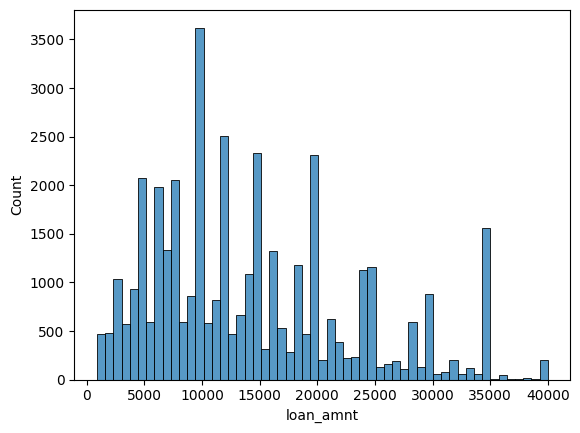

In [44]:
sns.histplot(data['loan_amnt'])

annual_inc


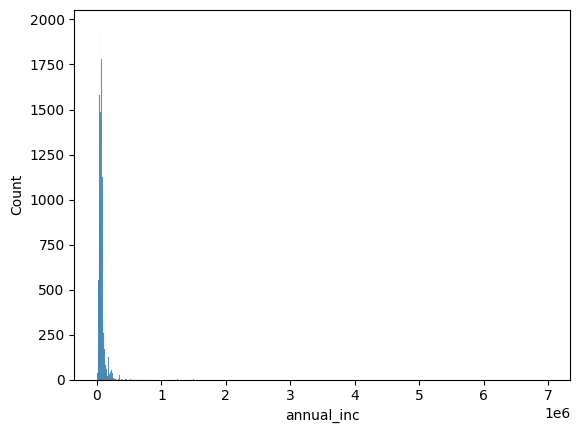

fico_range_high


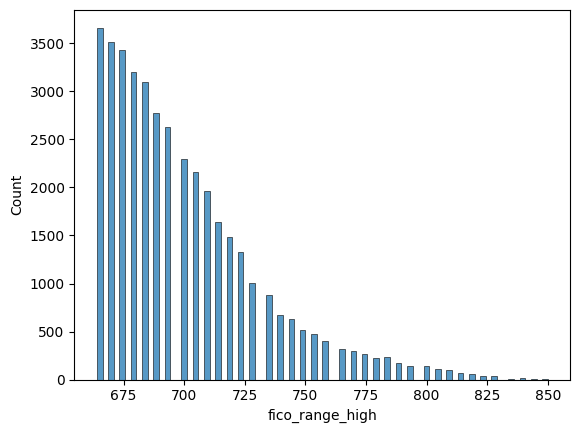

fico_range_low


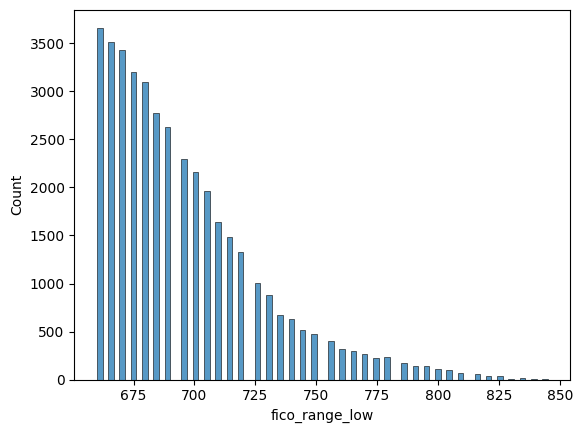

int_rate


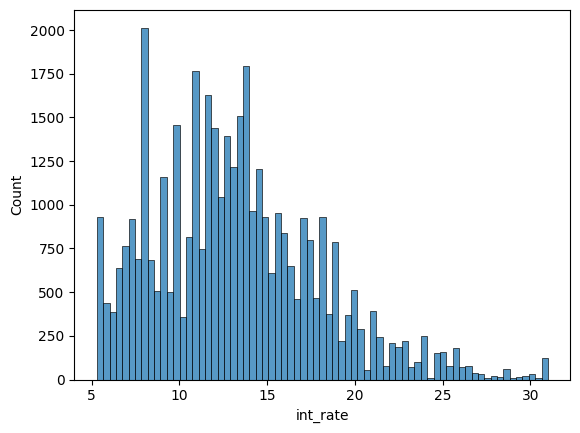

loan_amnt


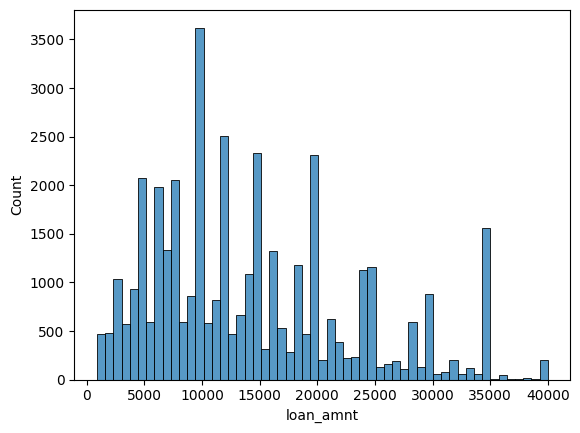

num_actv_bc_tl


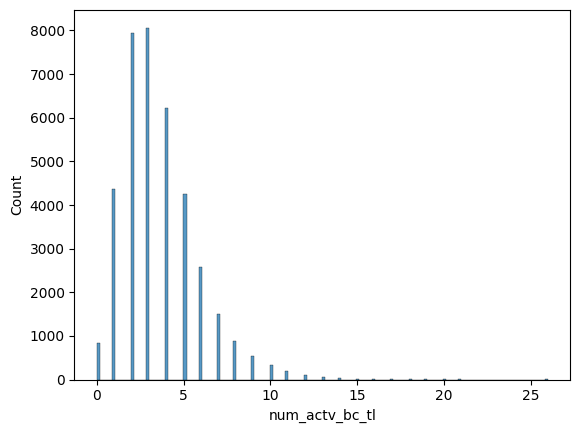

mort_acc


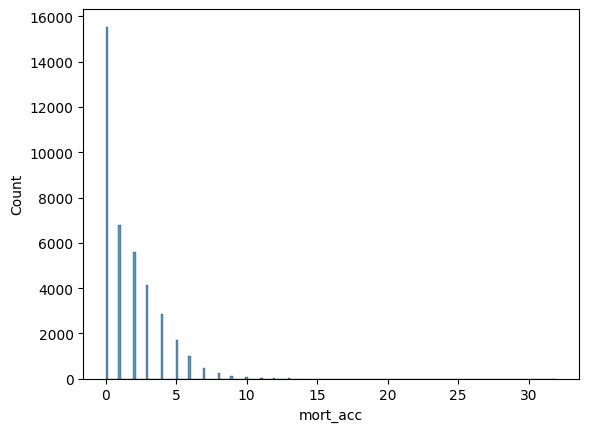

tot_cur_bal


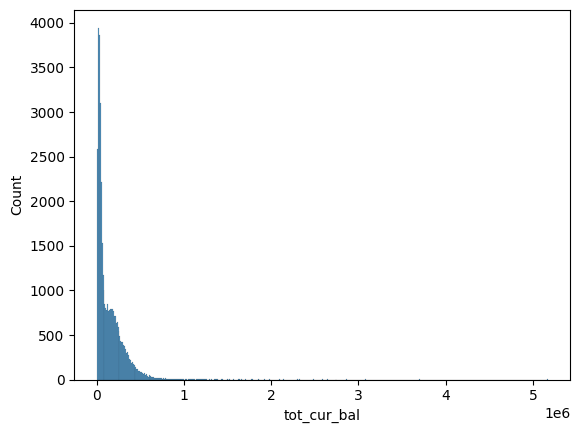

open_acc


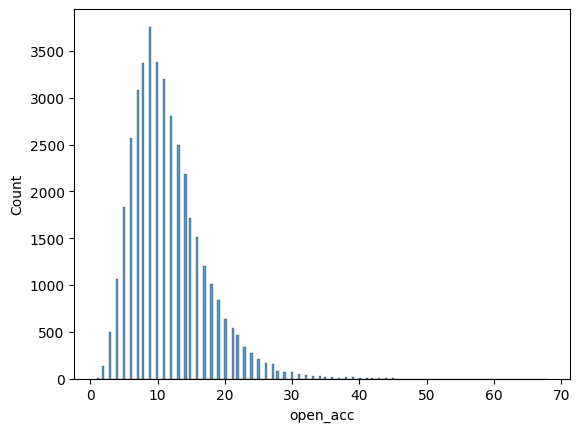

pub_rec


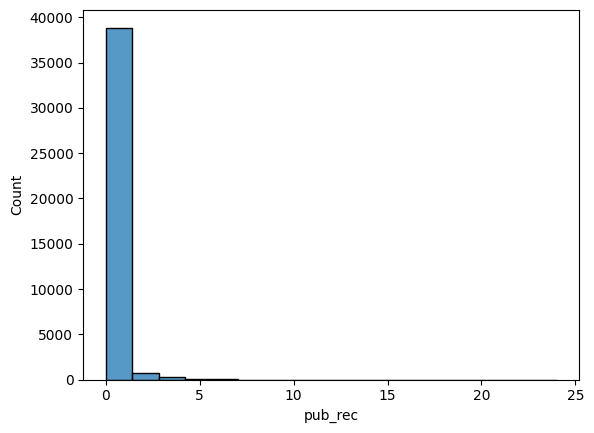

pub_rec_bankruptcies


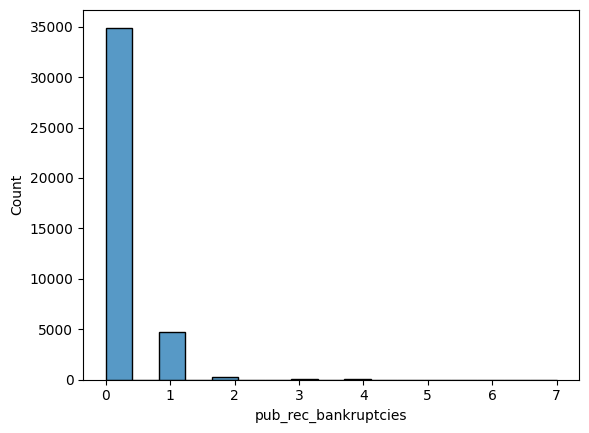

revol_bal


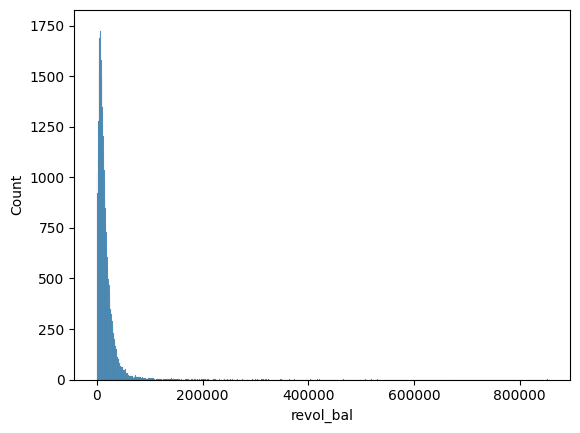

revol_util


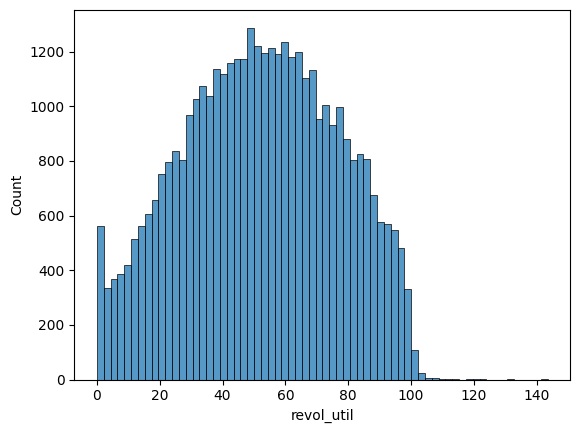

total_acc


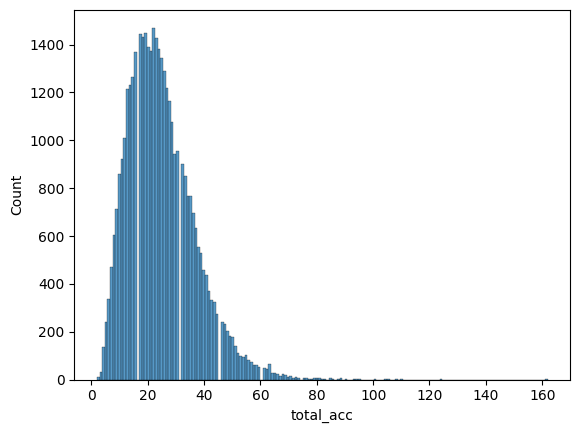

In [45]:
for col in data.select_dtypes(include = np.number).columns:
    print(col)
    sns.histplot(data[col])
    plt.show()

Understand Categorical data

In [46]:
data.select_dtypes(exclude = np.number)

addr_state earliest_cr_line emp_length                       emp_title  \
0             CO         Jul-1997  10+ years                          Deputy   
1             CA         Apr-1987  10+ years  Department of Veterans Affairs   
2             FL         Aug-2007  10+ years                Marble polishing   
3             IL         Sep-1980  10+ years                         printer   
4             MD         Jul-1999  10+ years                   Southern Mgmt   
...          ...              ...        ...                             ...   
39991         TX         Nov-1995    4 years                             SSR   
39992         HI         Apr-2000  10+ years                             CTO   
39993         UT         Jan-2007    4 years                Escrow Assistant   
39994         VT         Jun-1985  10+ years       Quality Assurance Manager   
39995         KY         Apr-2007     1 year                 Factory worker    

      grade home_ownership application_type initial_list_status  \
0         E       MORTGAGE       Individual                   w   
1         B           RENT       Individual                   w   
2         B       MORTGAGE       Individual                   w   
3         B       MORTGAGE       Individual                   w   
4         F           RENT       Individual                   f   
...     ...            ...              ...                 ...   
39991     E           RENT       Individual                   w   
39992     B       MORTGAGE       Individual                   w   
39993     B            OWN       Individual                   w   
39994     B            OWN       Individual                   w   
39995     C       MORTGAGE       Individual                   f   

                  purpose sub_grade        term                    title  \
0      debt_consolidation        E1   60 months       Debt consolidation   
1      debt_consolidation        B1   36 months              Credit Loan   
2      debt_consolidation        B5   36 months       Debt consolidation   
3      debt_consolidation        B2   36 months       Debt consolidation   
4      debt_consolidation        F5   60 months      Debt Connsolidation   
...                   ...       ...         ...                      ...   
39991         credit_card        E3   60 months  Credit card refinancing   
39992  debt_consolidation        B2   36 months       Debt consolidation   
39993  debt_consolidation        B5   36 months       Debt consolidation   
39994         credit_card        B1   36 months  Credit card refinancing   
39995         credit_card        C5   36 months  Credit card refinancing   

      verification_status  loan_status  
0         Source Verified  Charged Off  
1                Verified   Fully Paid  
2         Source Verified   Fully Paid  
3         Source Verified   Fully Paid  
4                Verified   Fully Paid  
...                   ...          ...  
39991     Source Verified   Fully Paid  
39992     Source Verified   Fully Paid  
39993     Source Verified  Charged Off  
39994        Not Verified   Fully Paid  
39995             Not Ver          NaN  

[39996 rows x 14 columns]

In [47]:
# plt.scatter(data['title'].str.replace('\$\$','\\$\\$'), data['loan_status'])

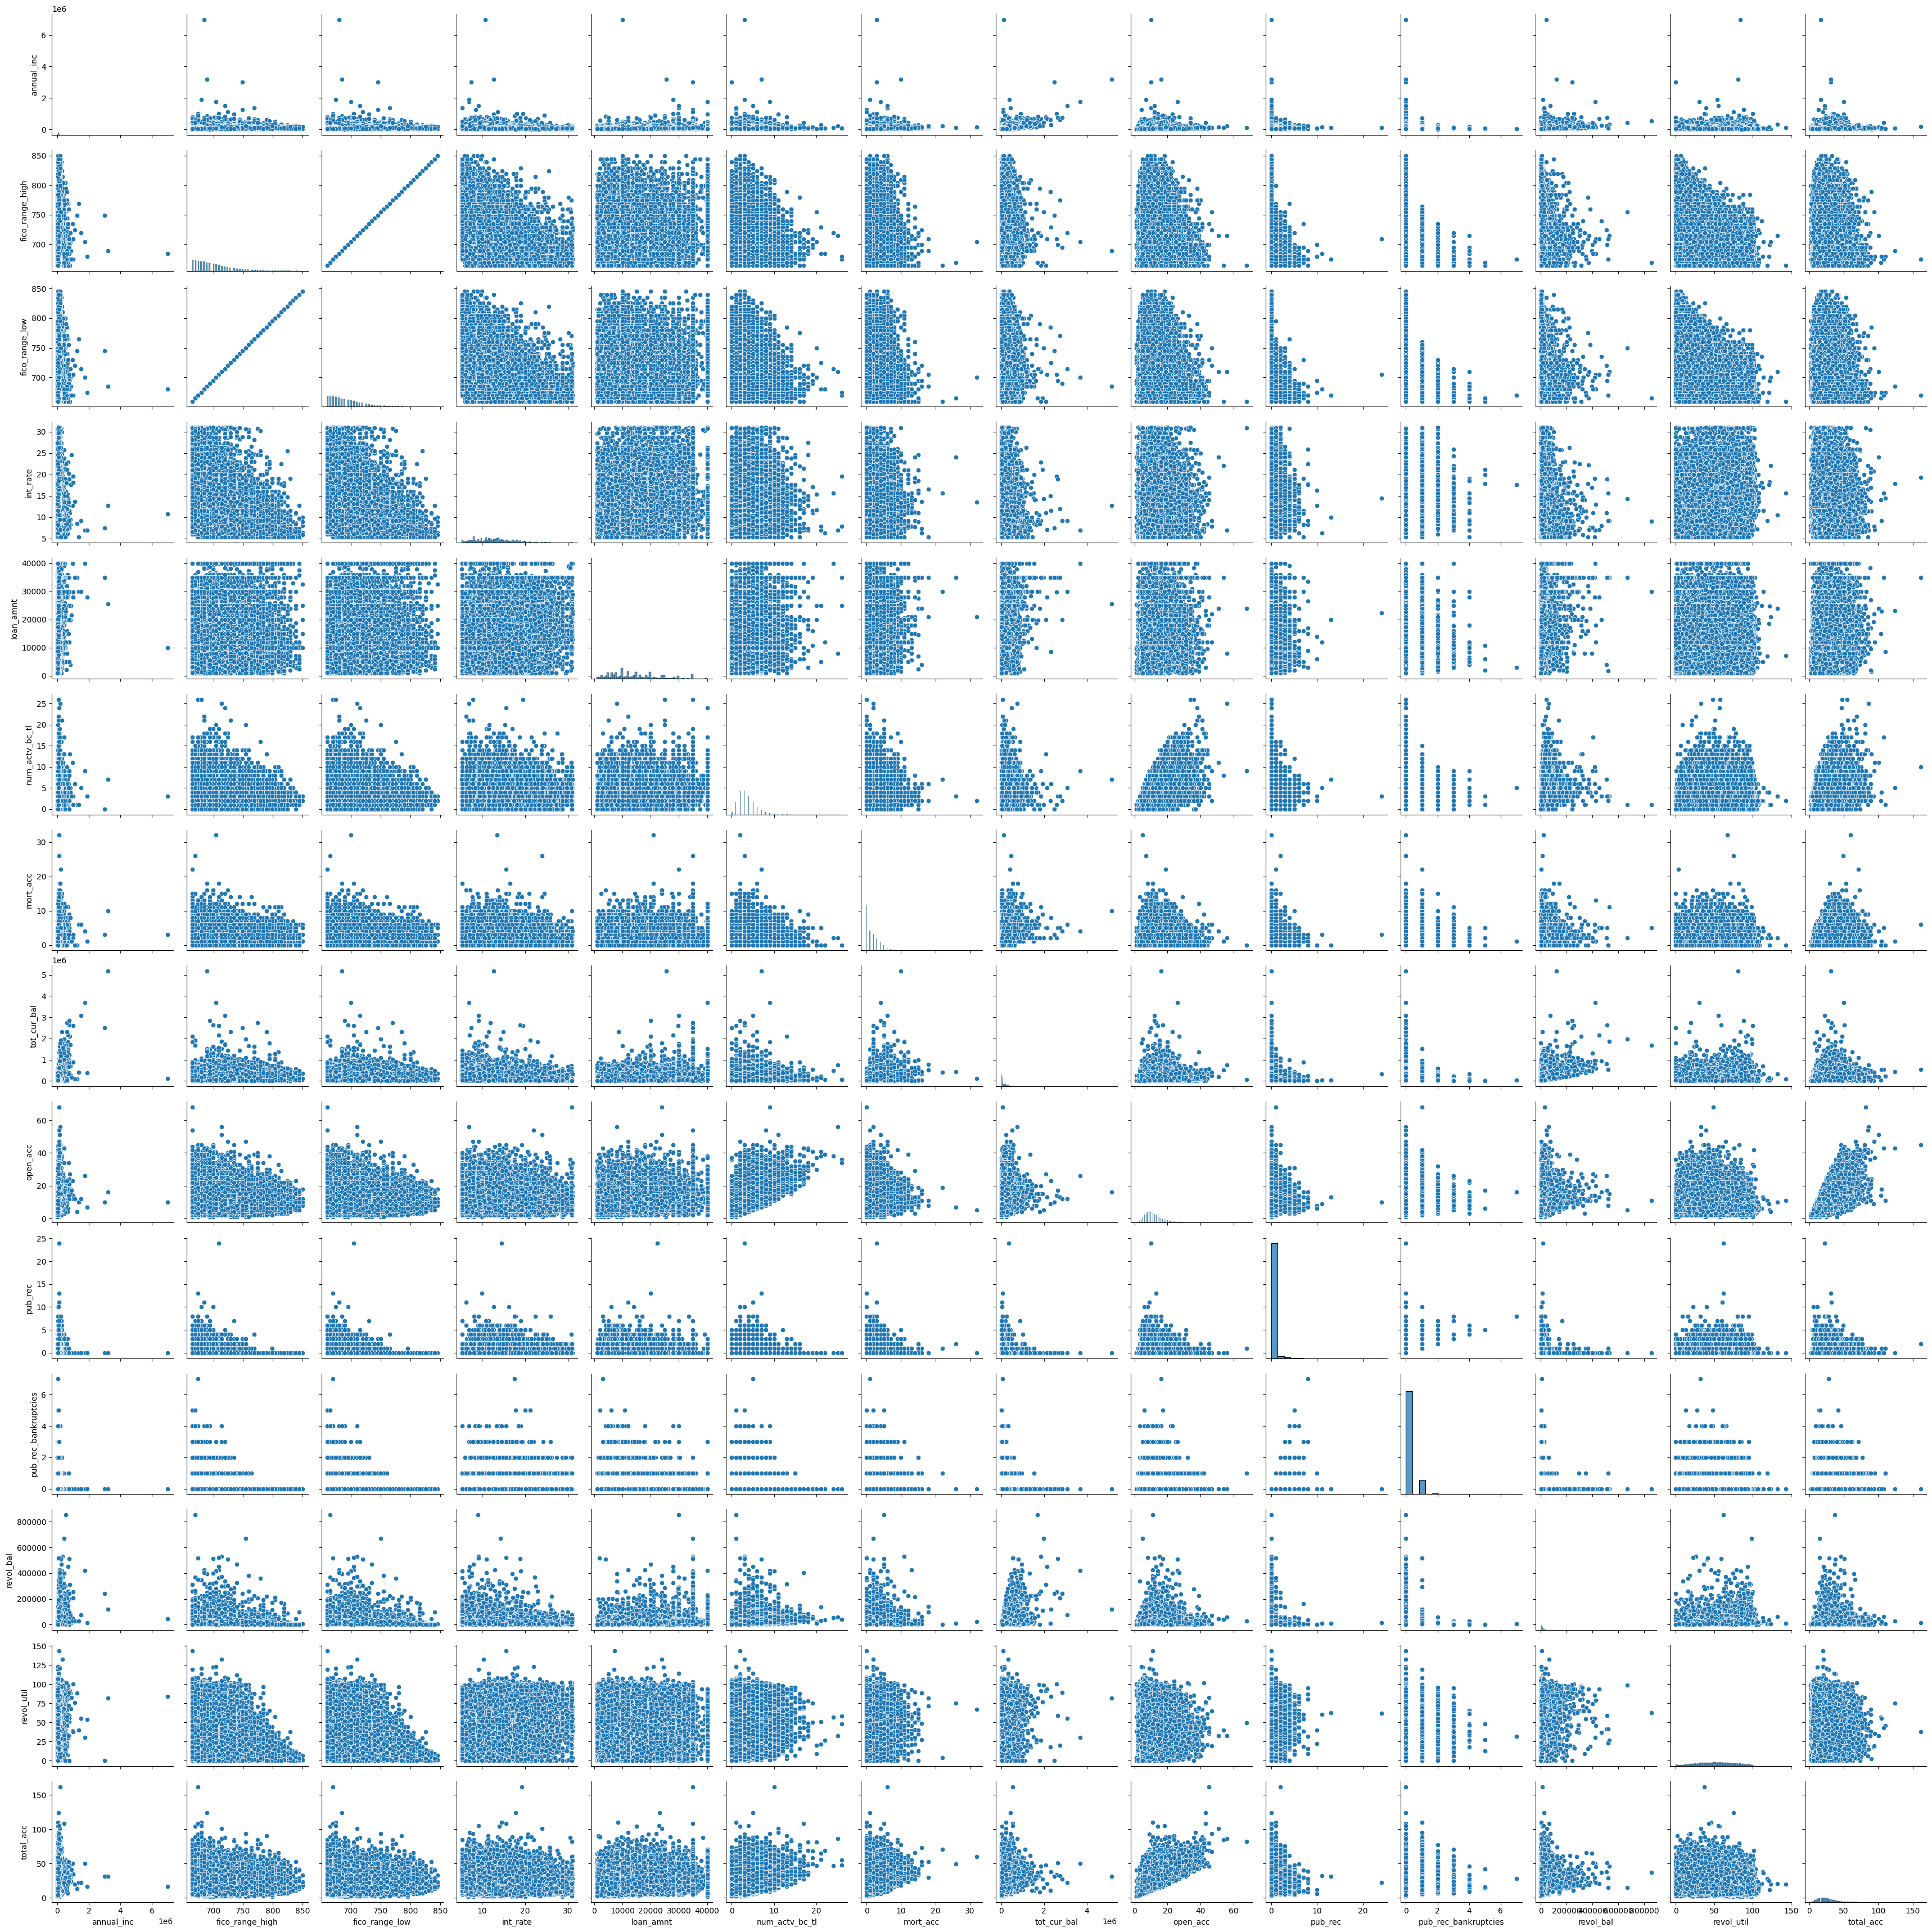

In [48]:
sns.pairplot(data)

<Axes: xlabel='pub_rec_bankruptcies'>

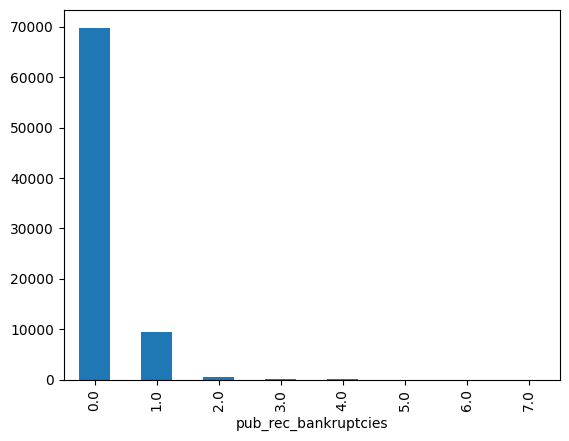

In [ ]:
# data[data['title'].groupby(data['loan_status'])]

data.groupby('pub_rec_bankruptcies')['loan_status'].count().sort_values(ascending = False).plot.bar()



addr_state


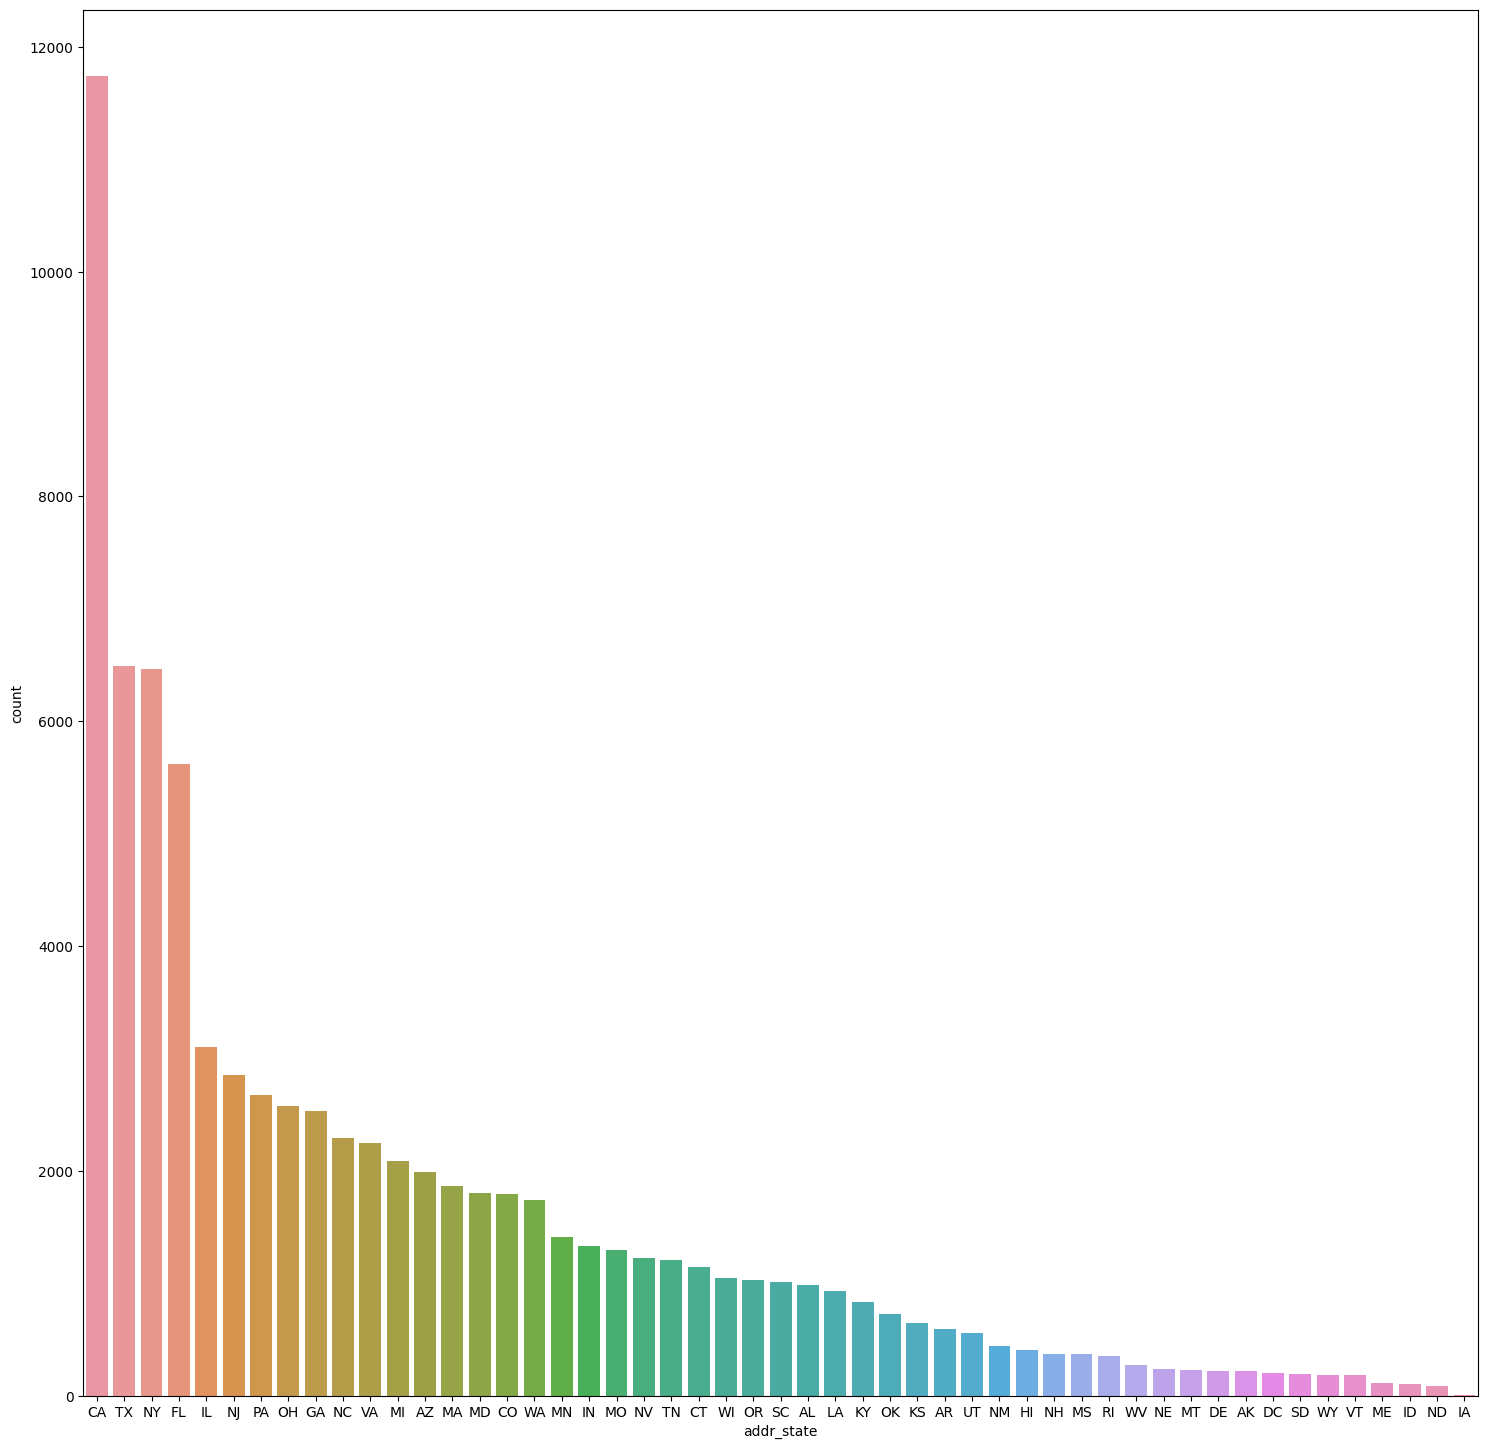

earliest_cr_line


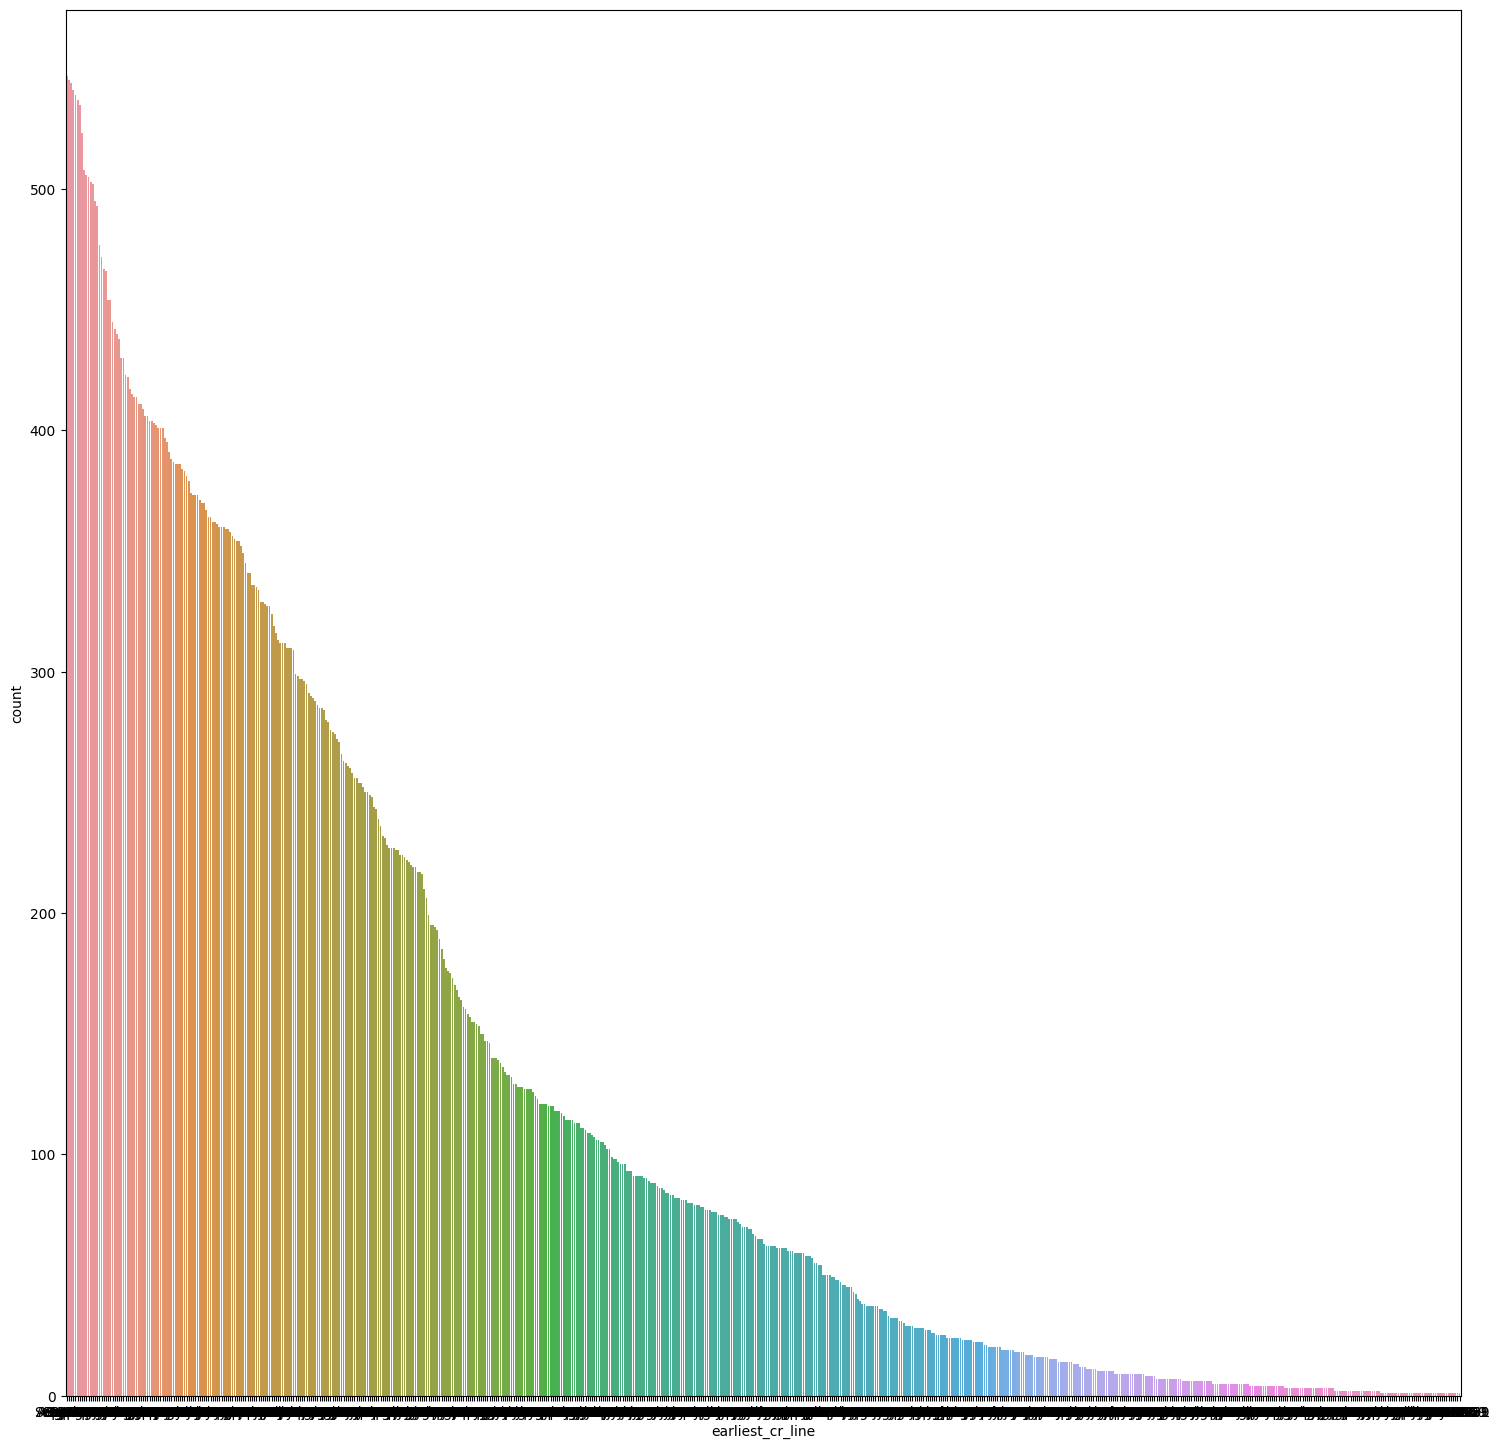

emp_length


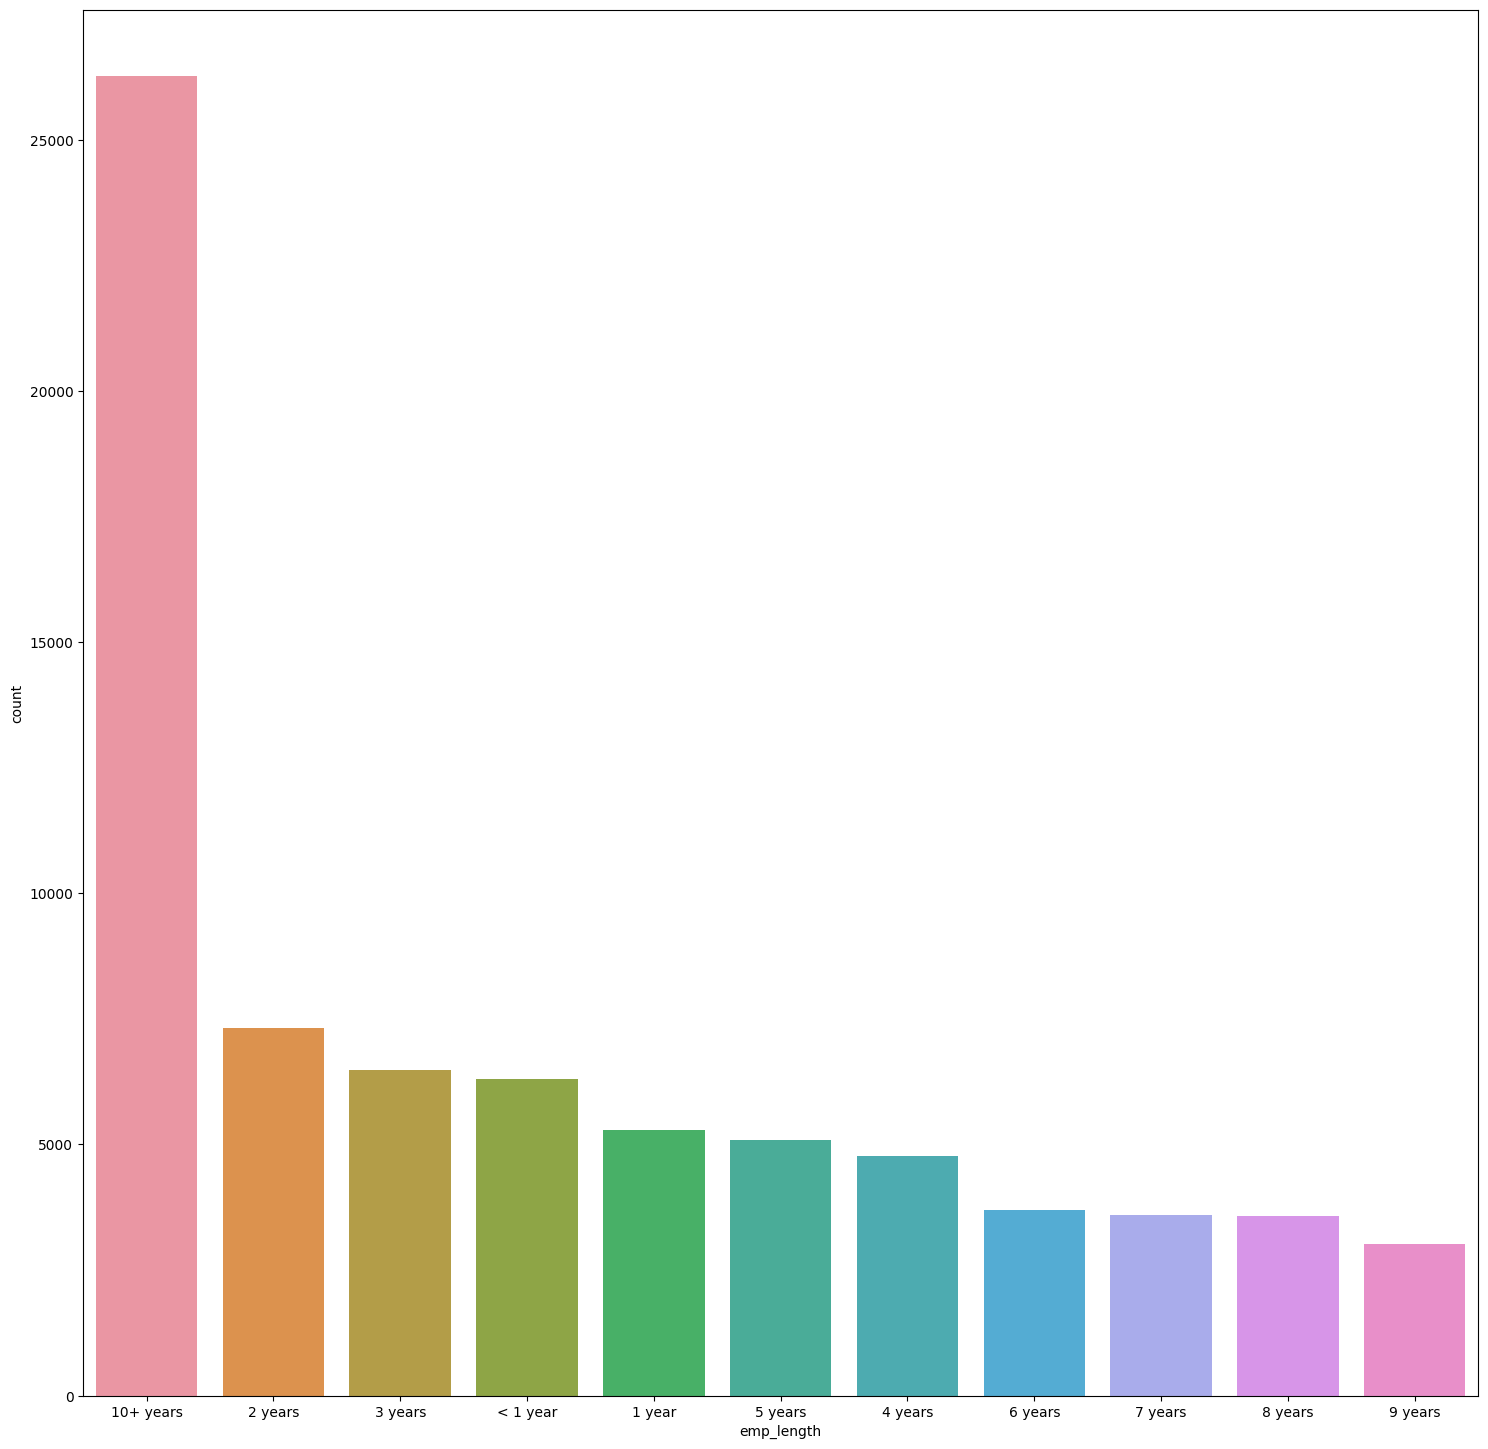

emp_title


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


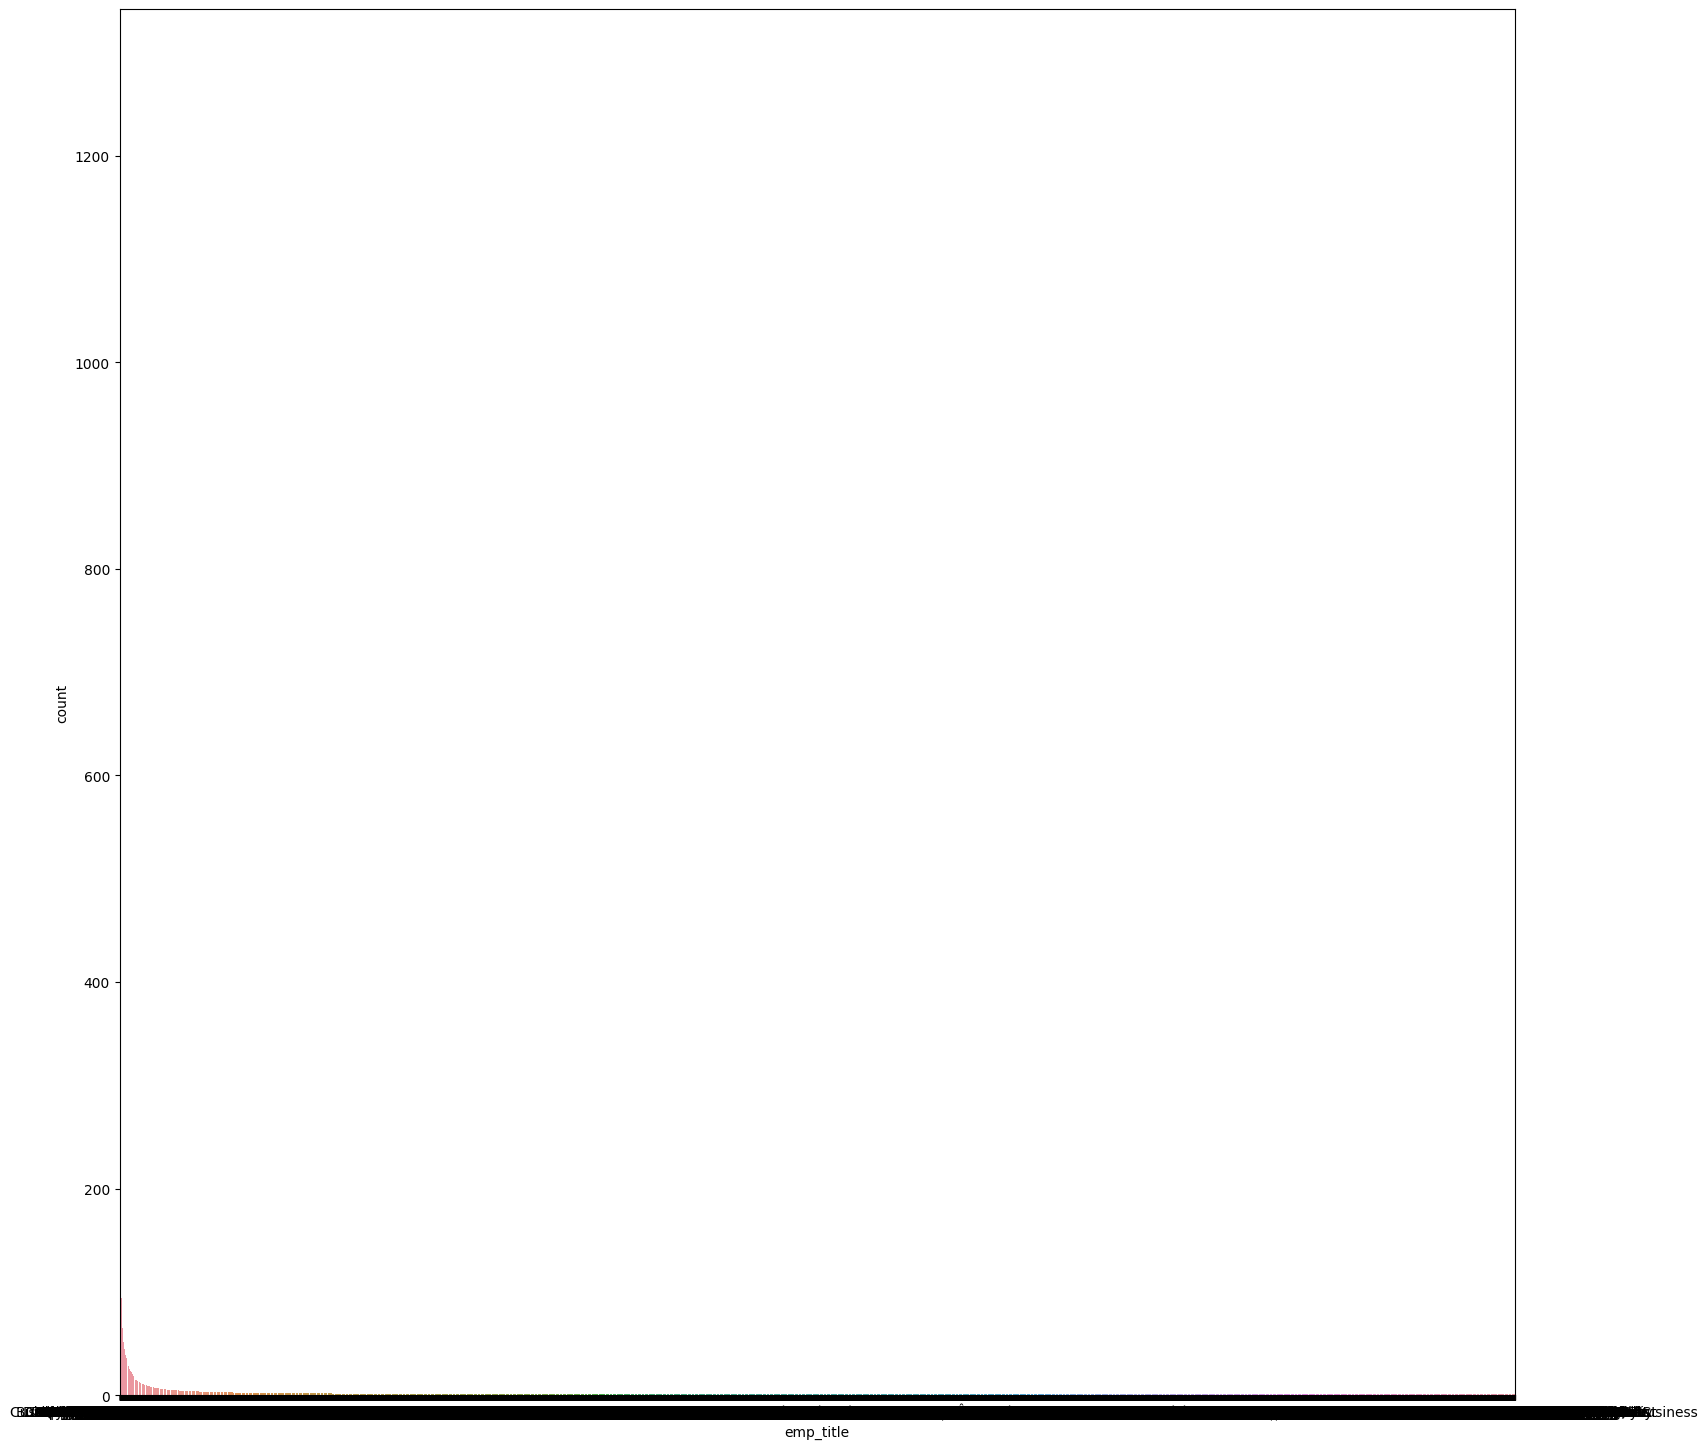

grade


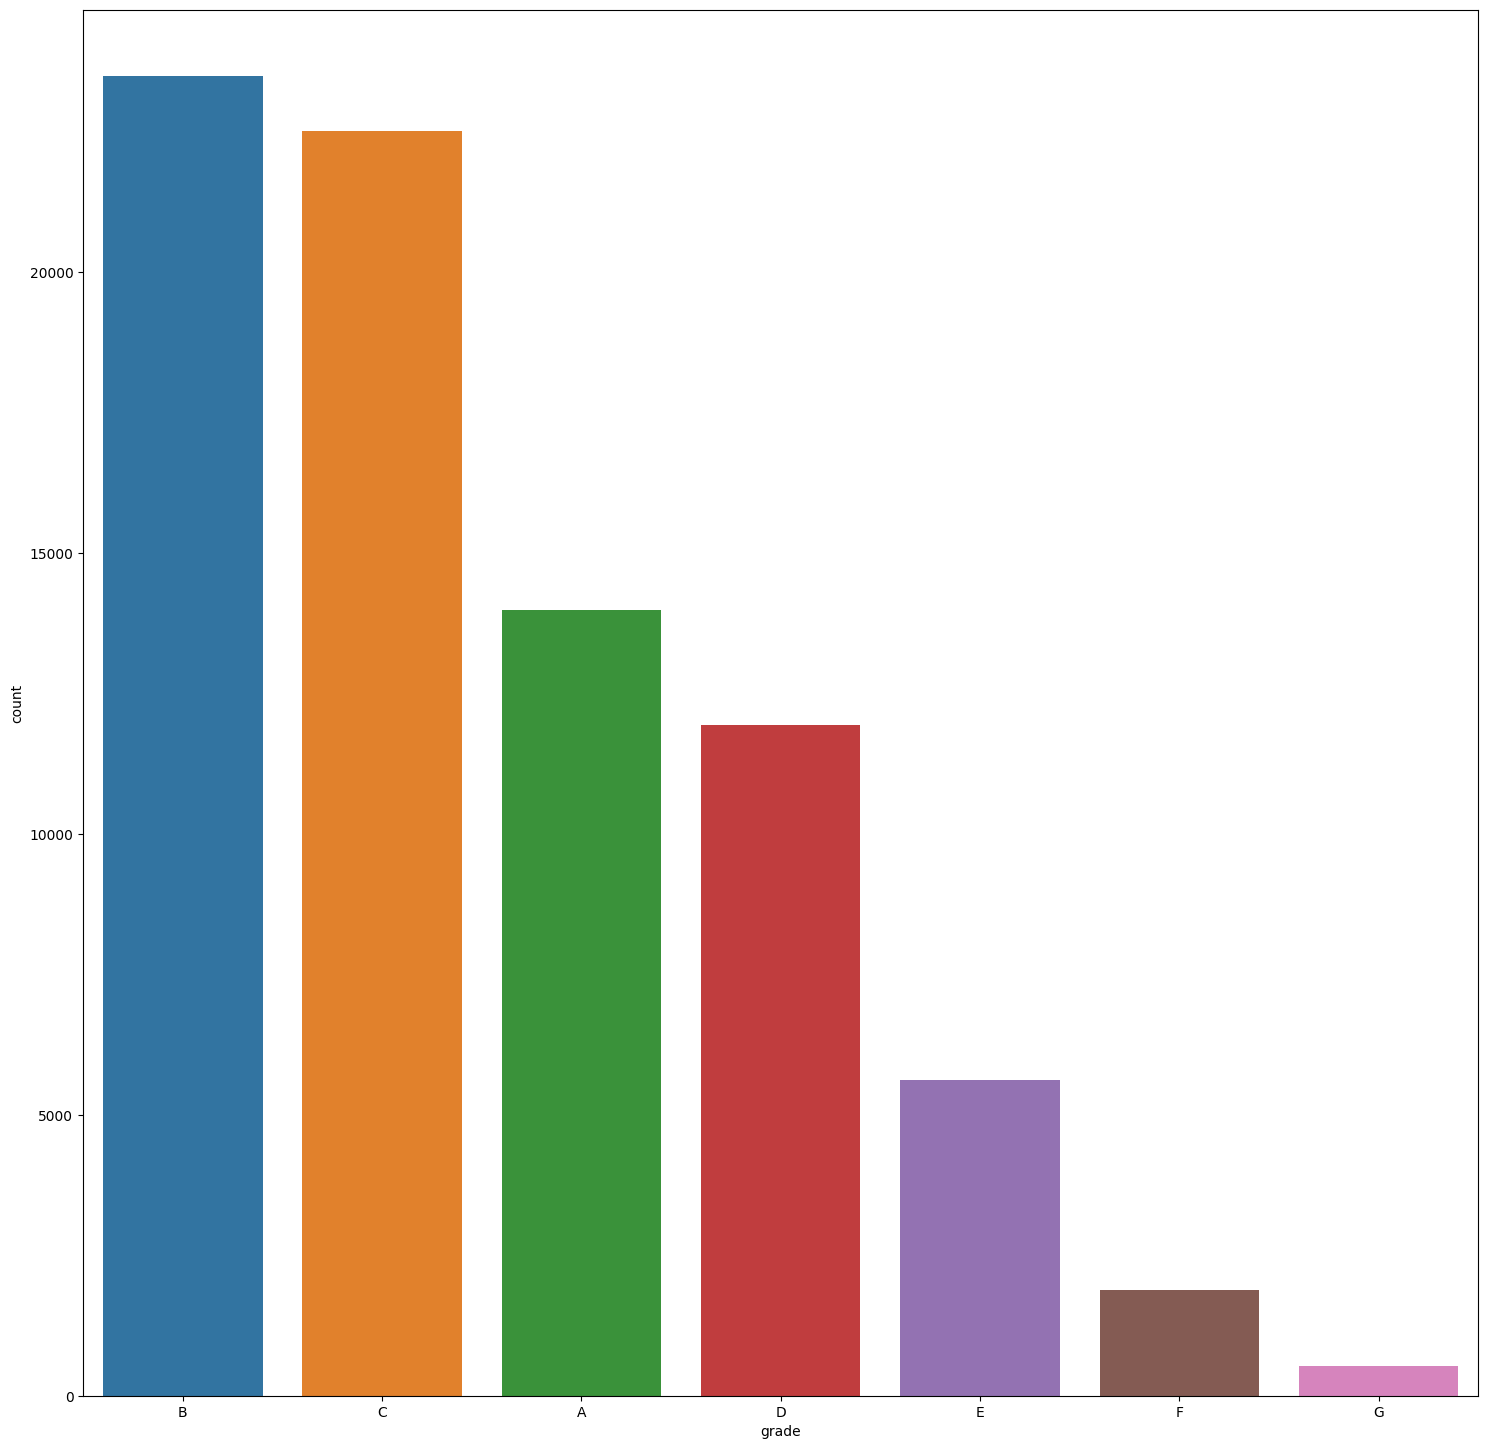

home_ownership


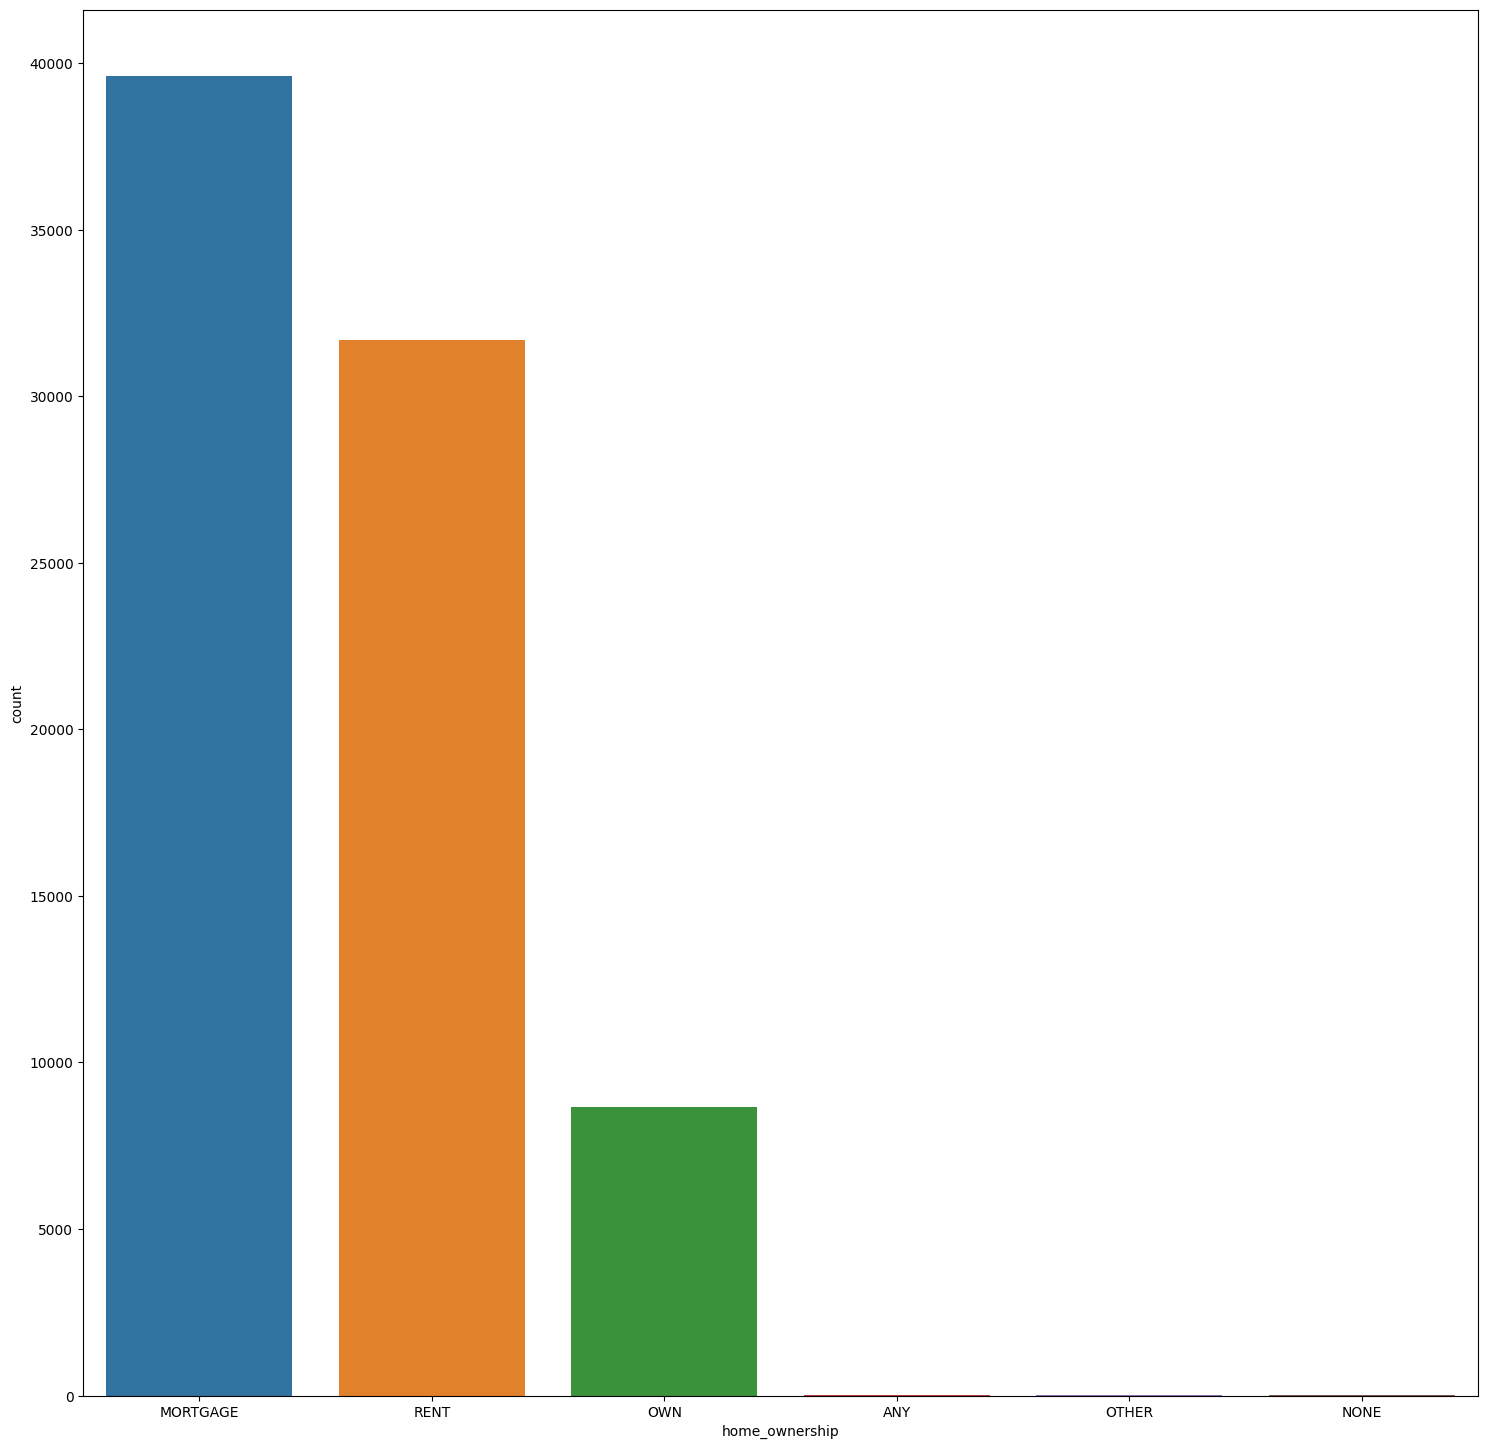

application_type


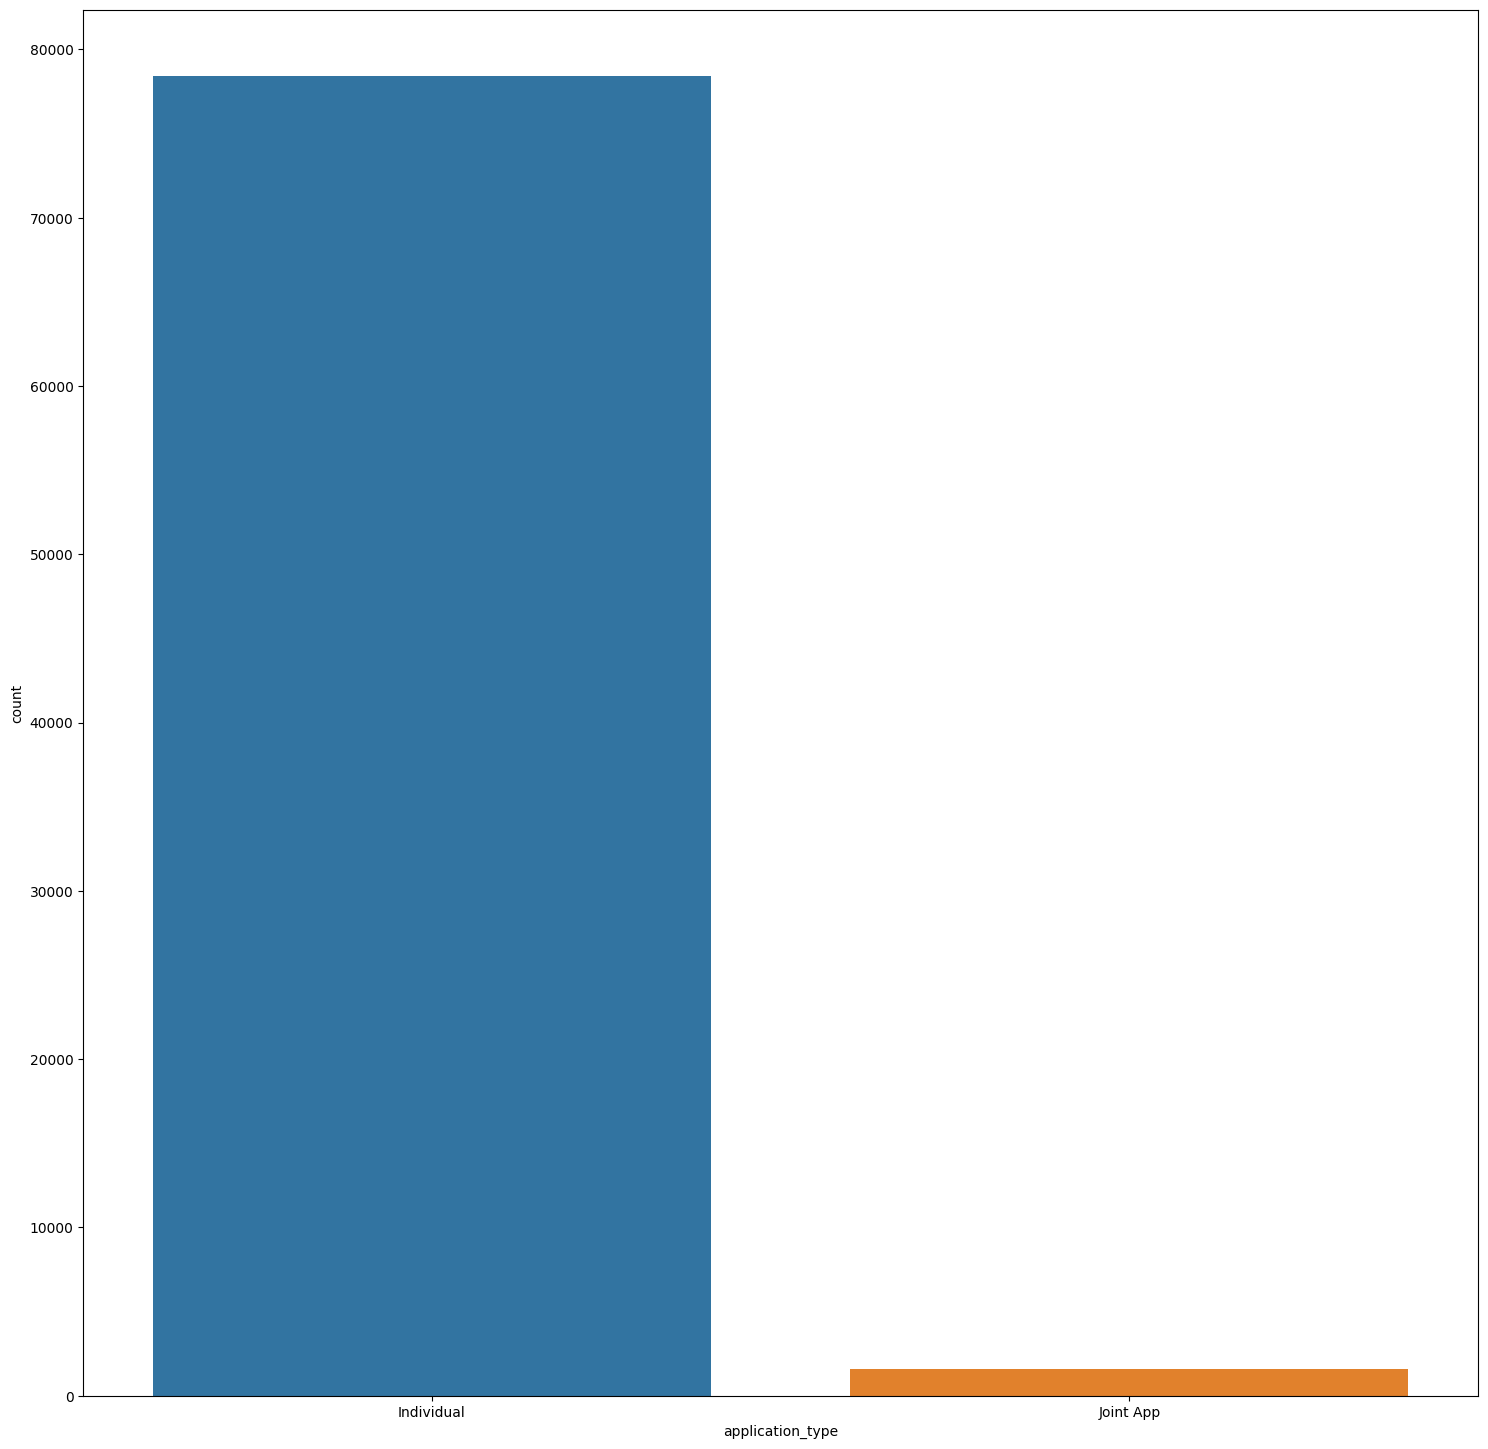

initial_list_status


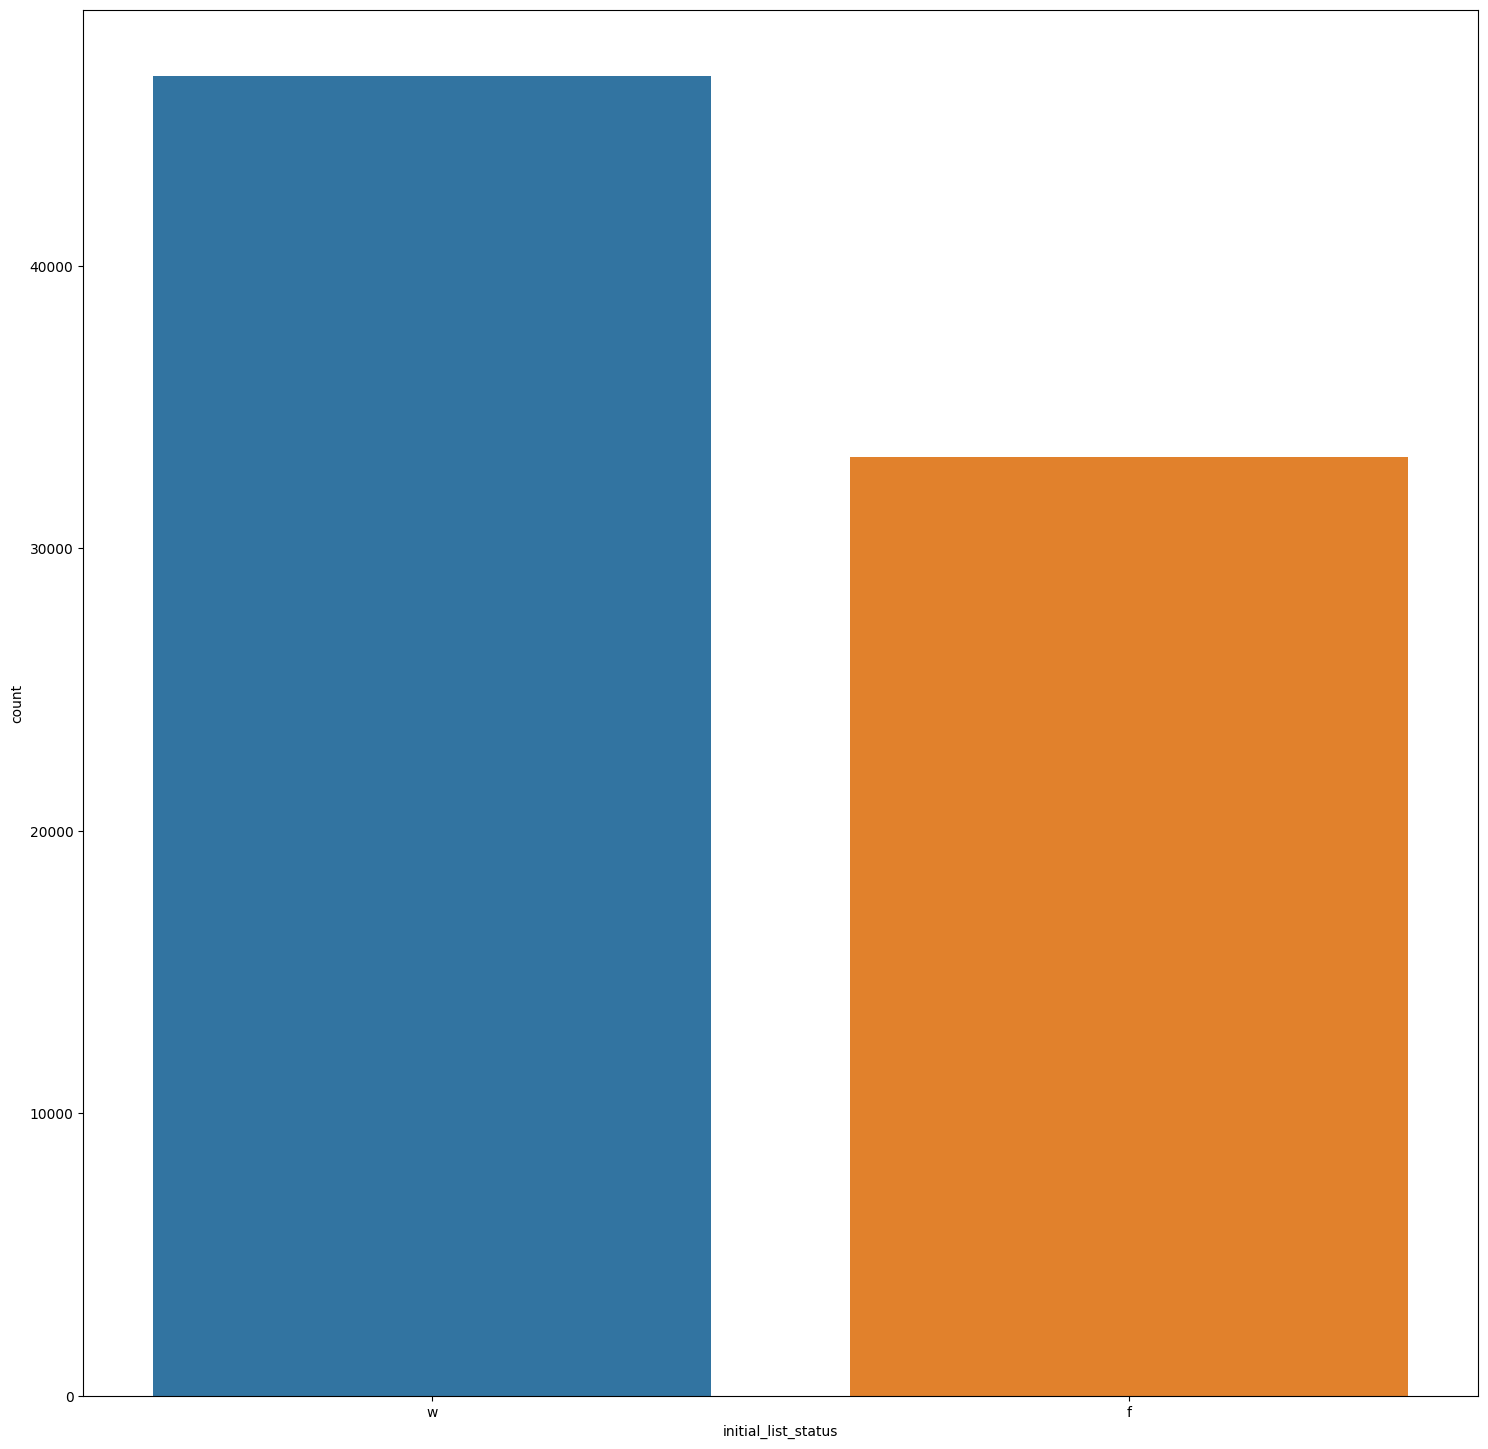

purpose


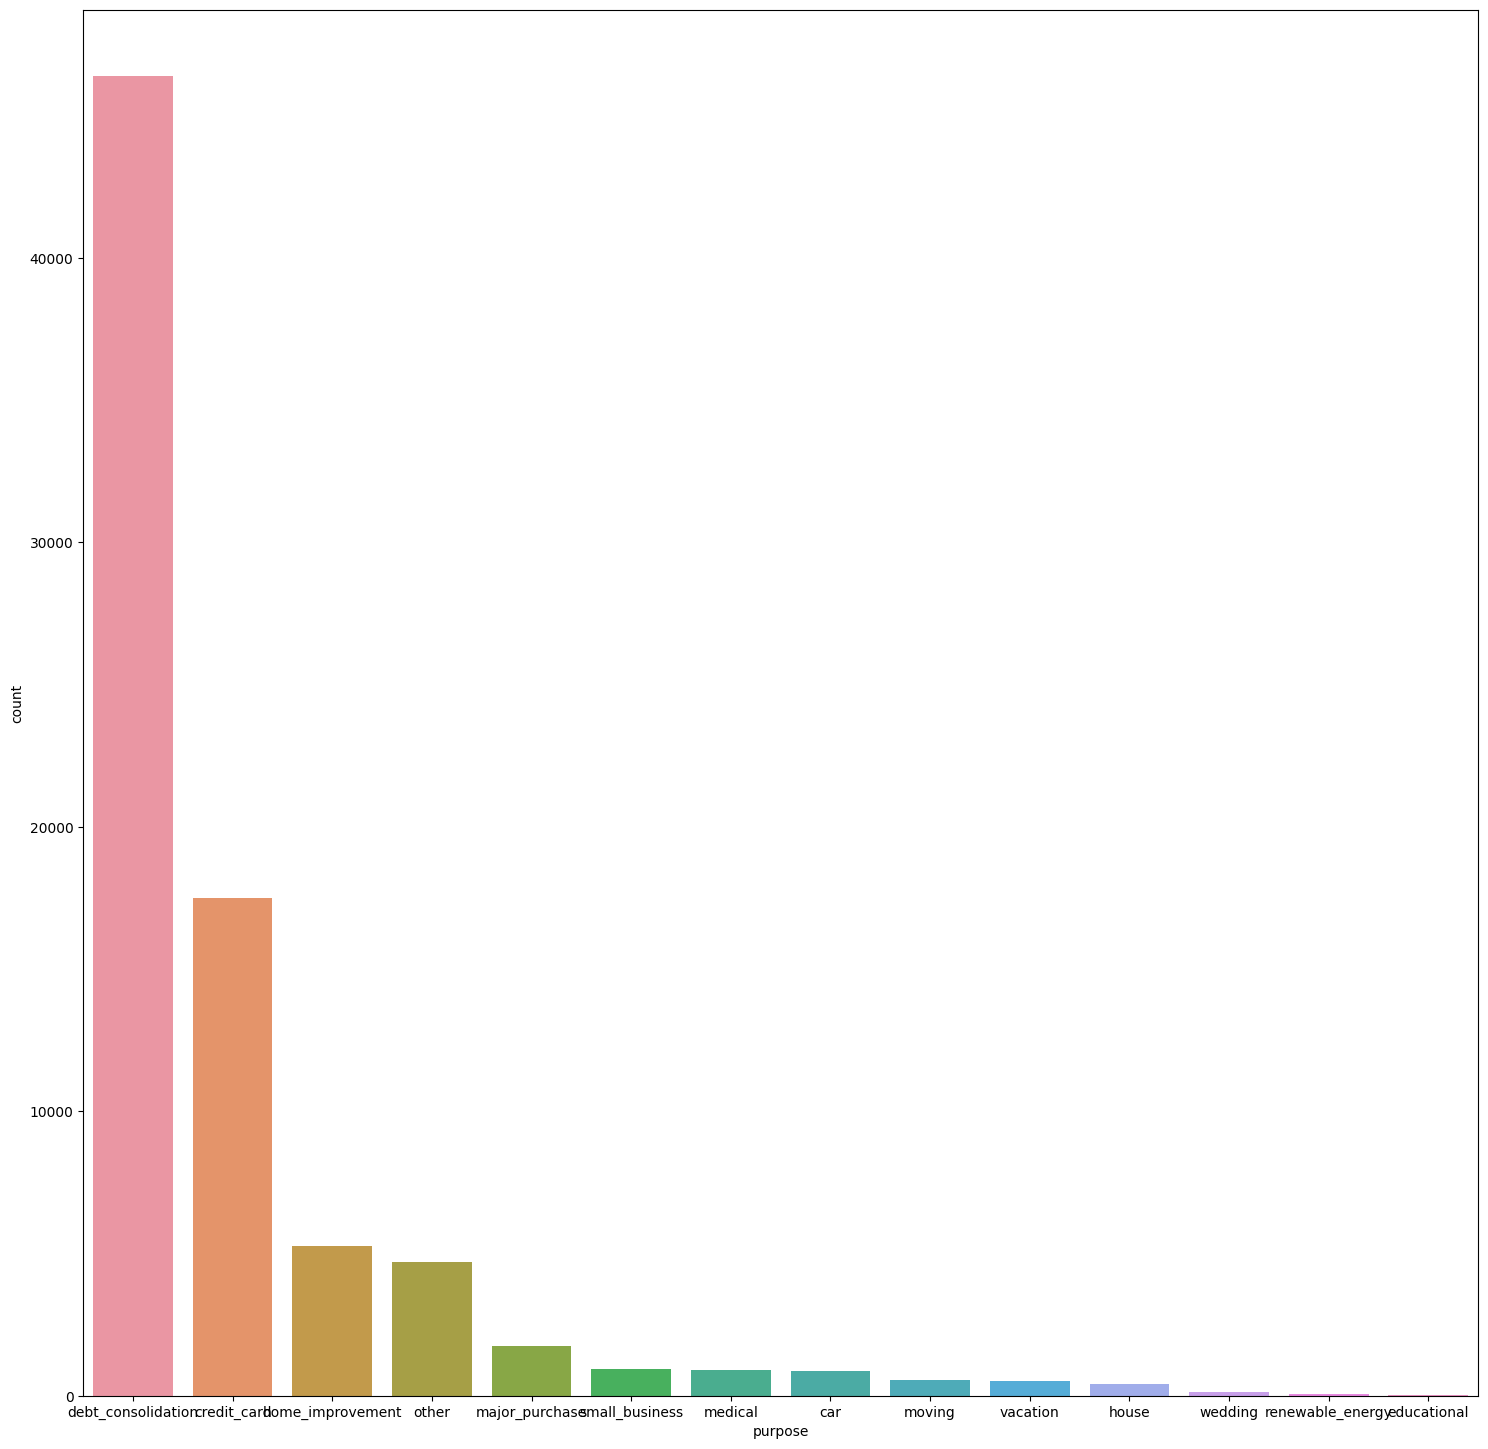

sub_grade


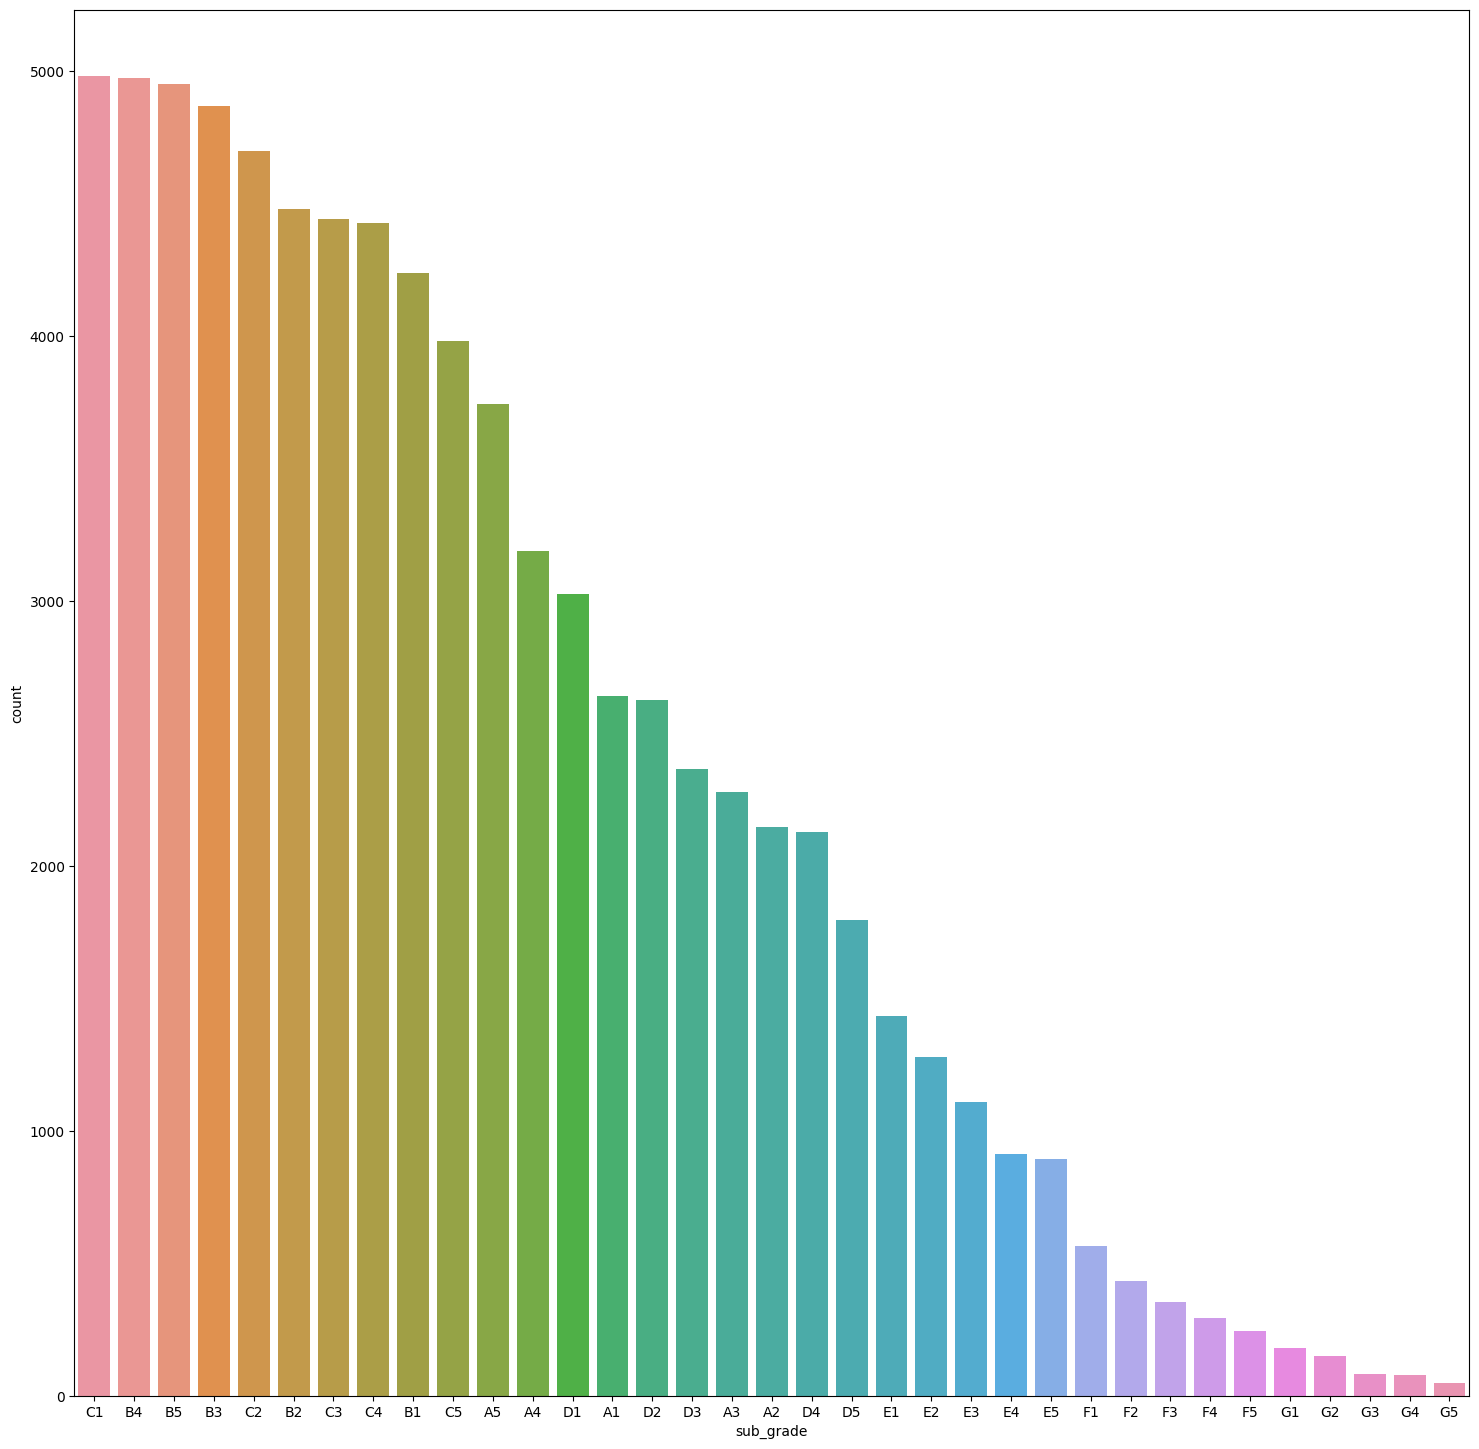

term


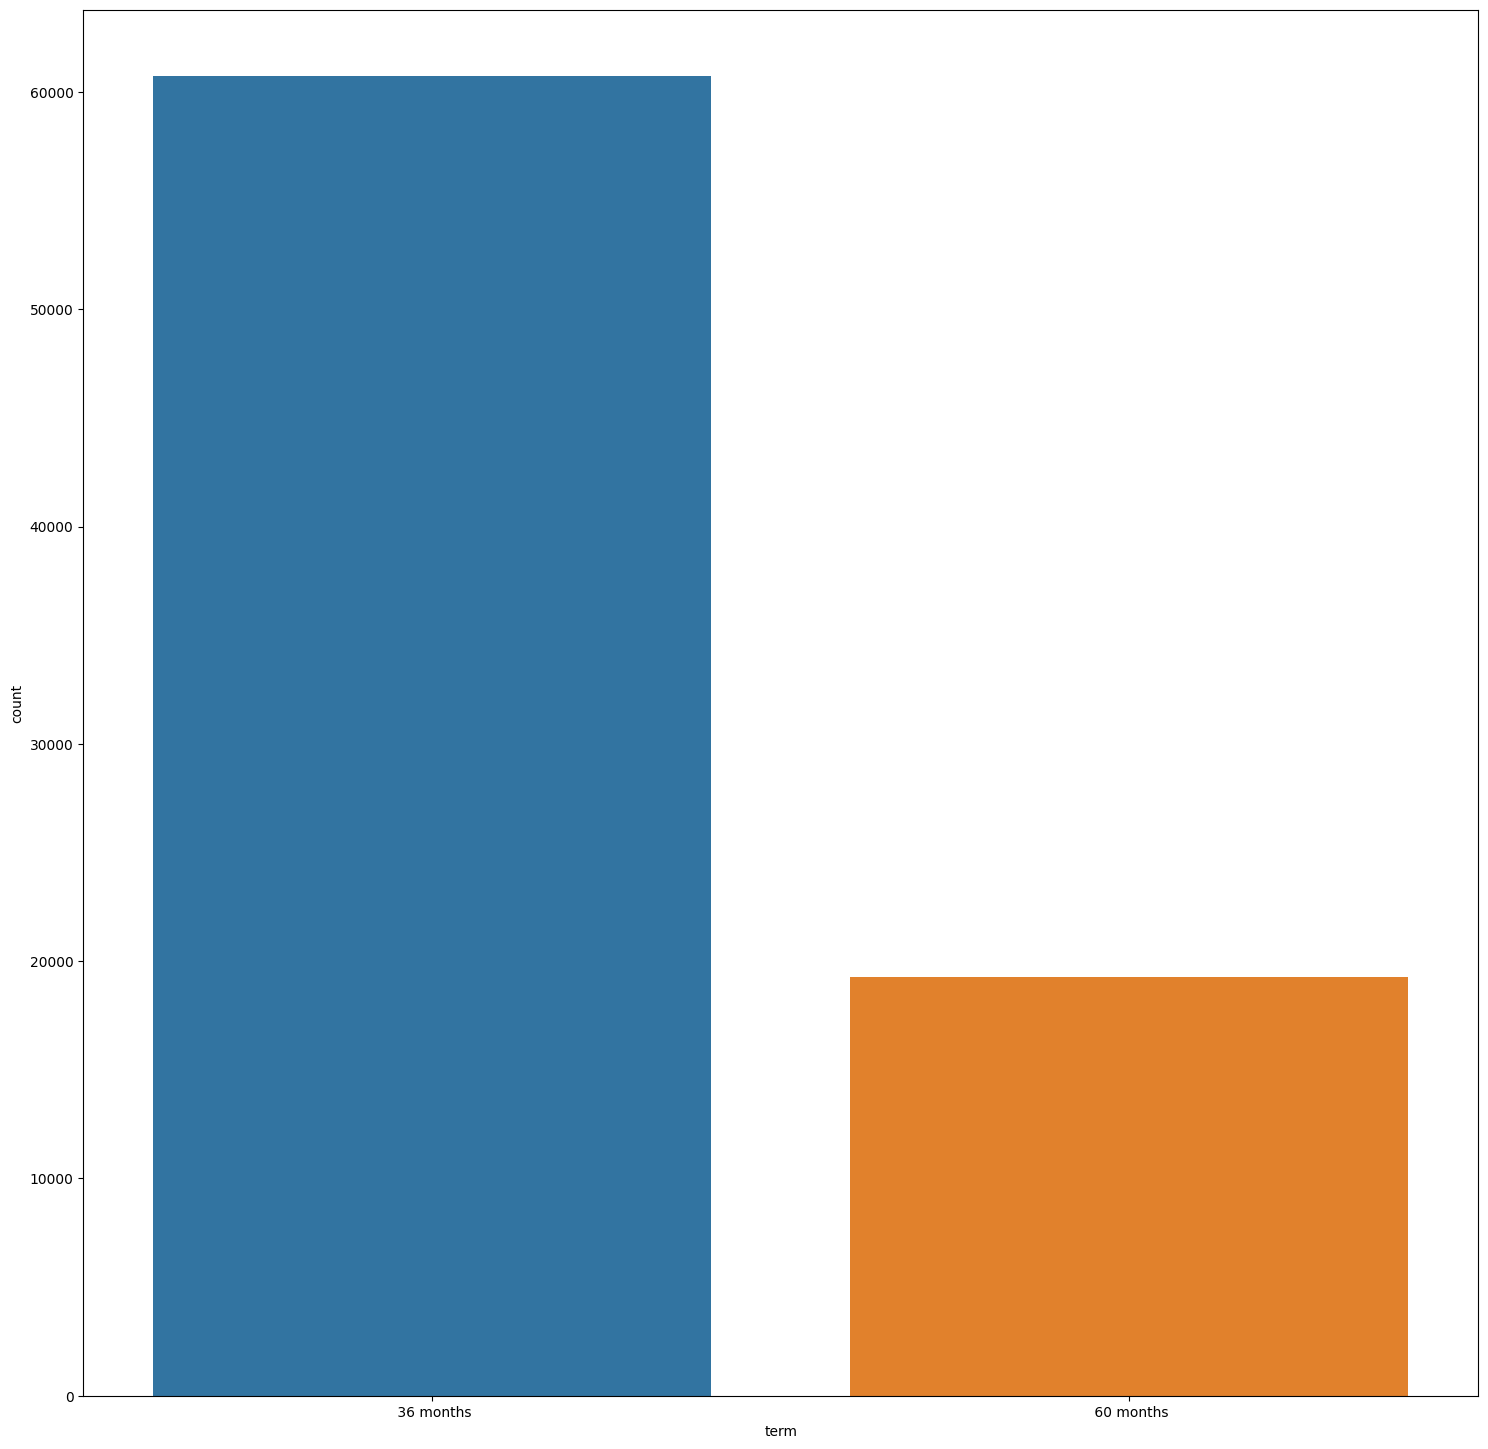

title


<Figure size 1800x1800 with 0 Axes>

verification_status


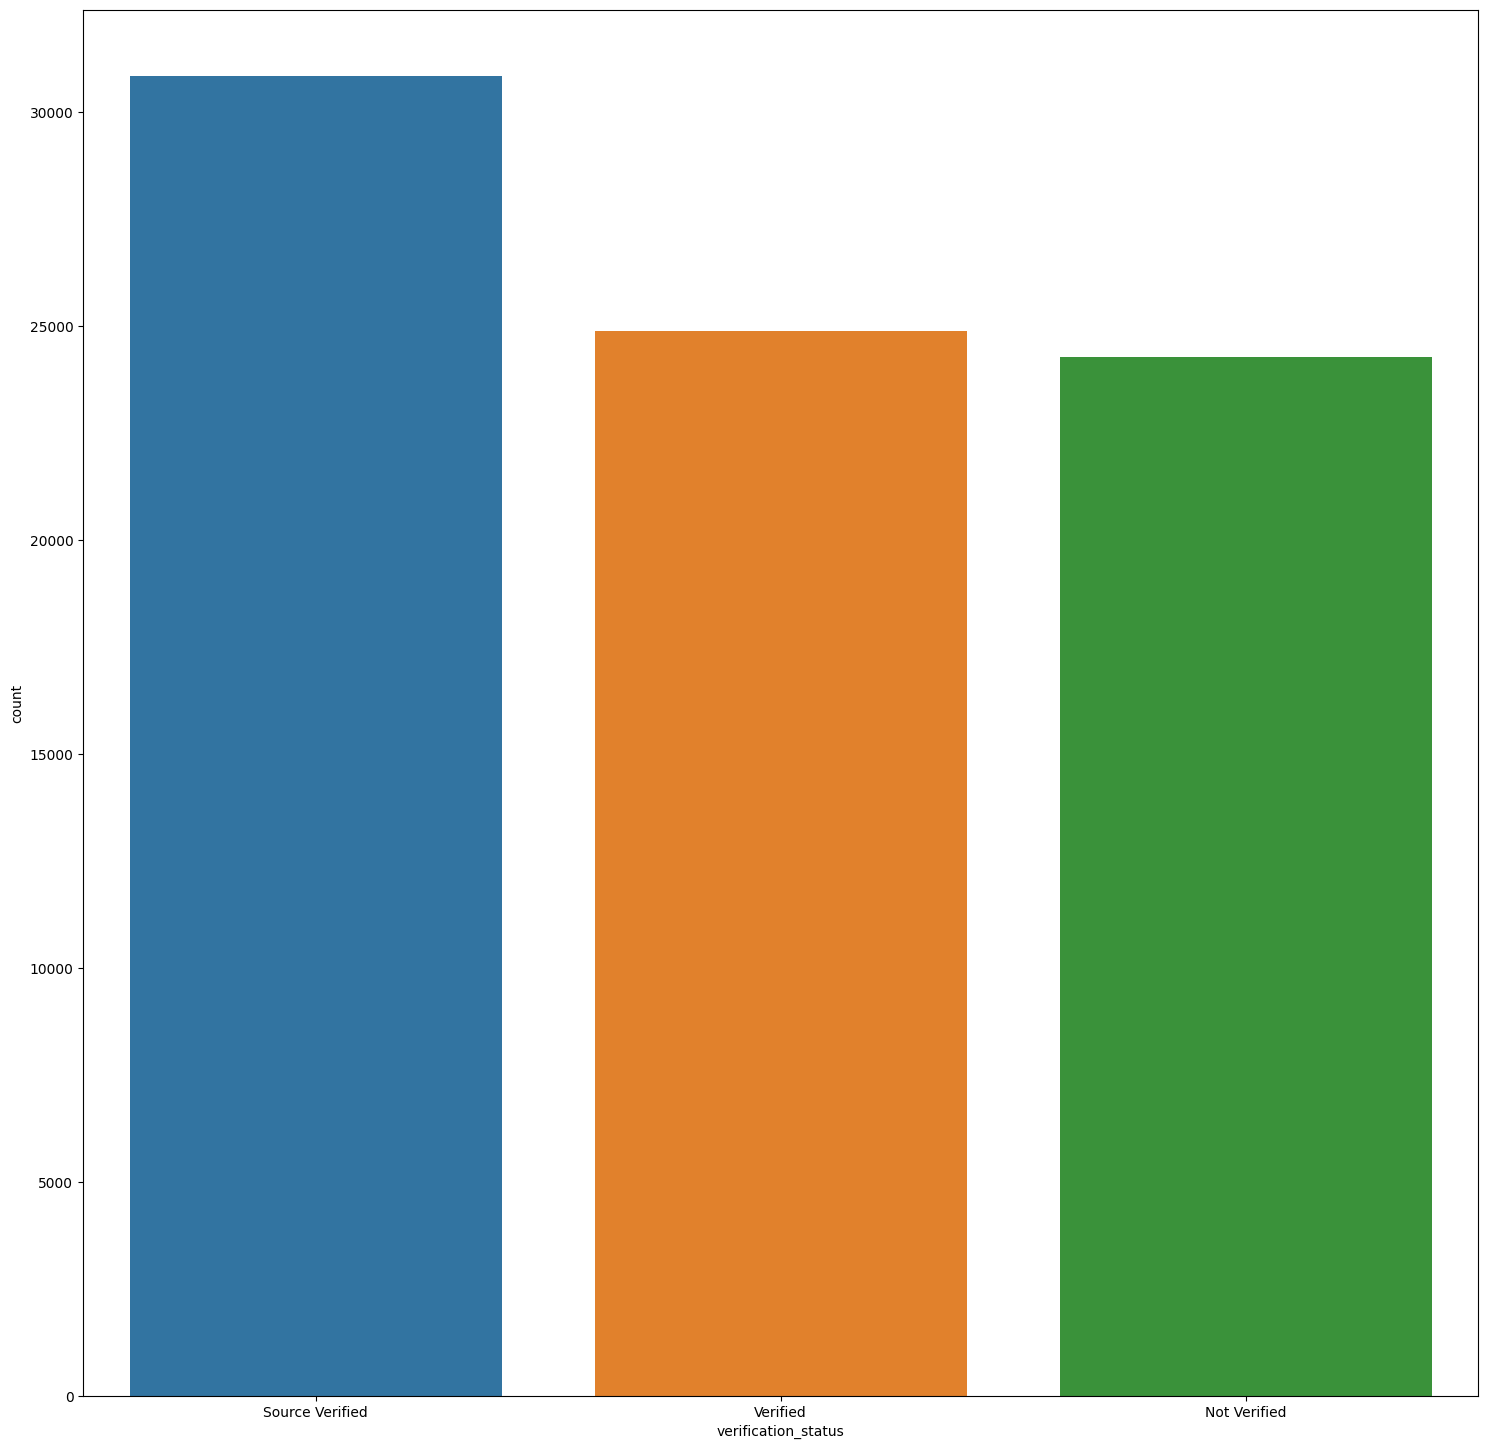

loan_status


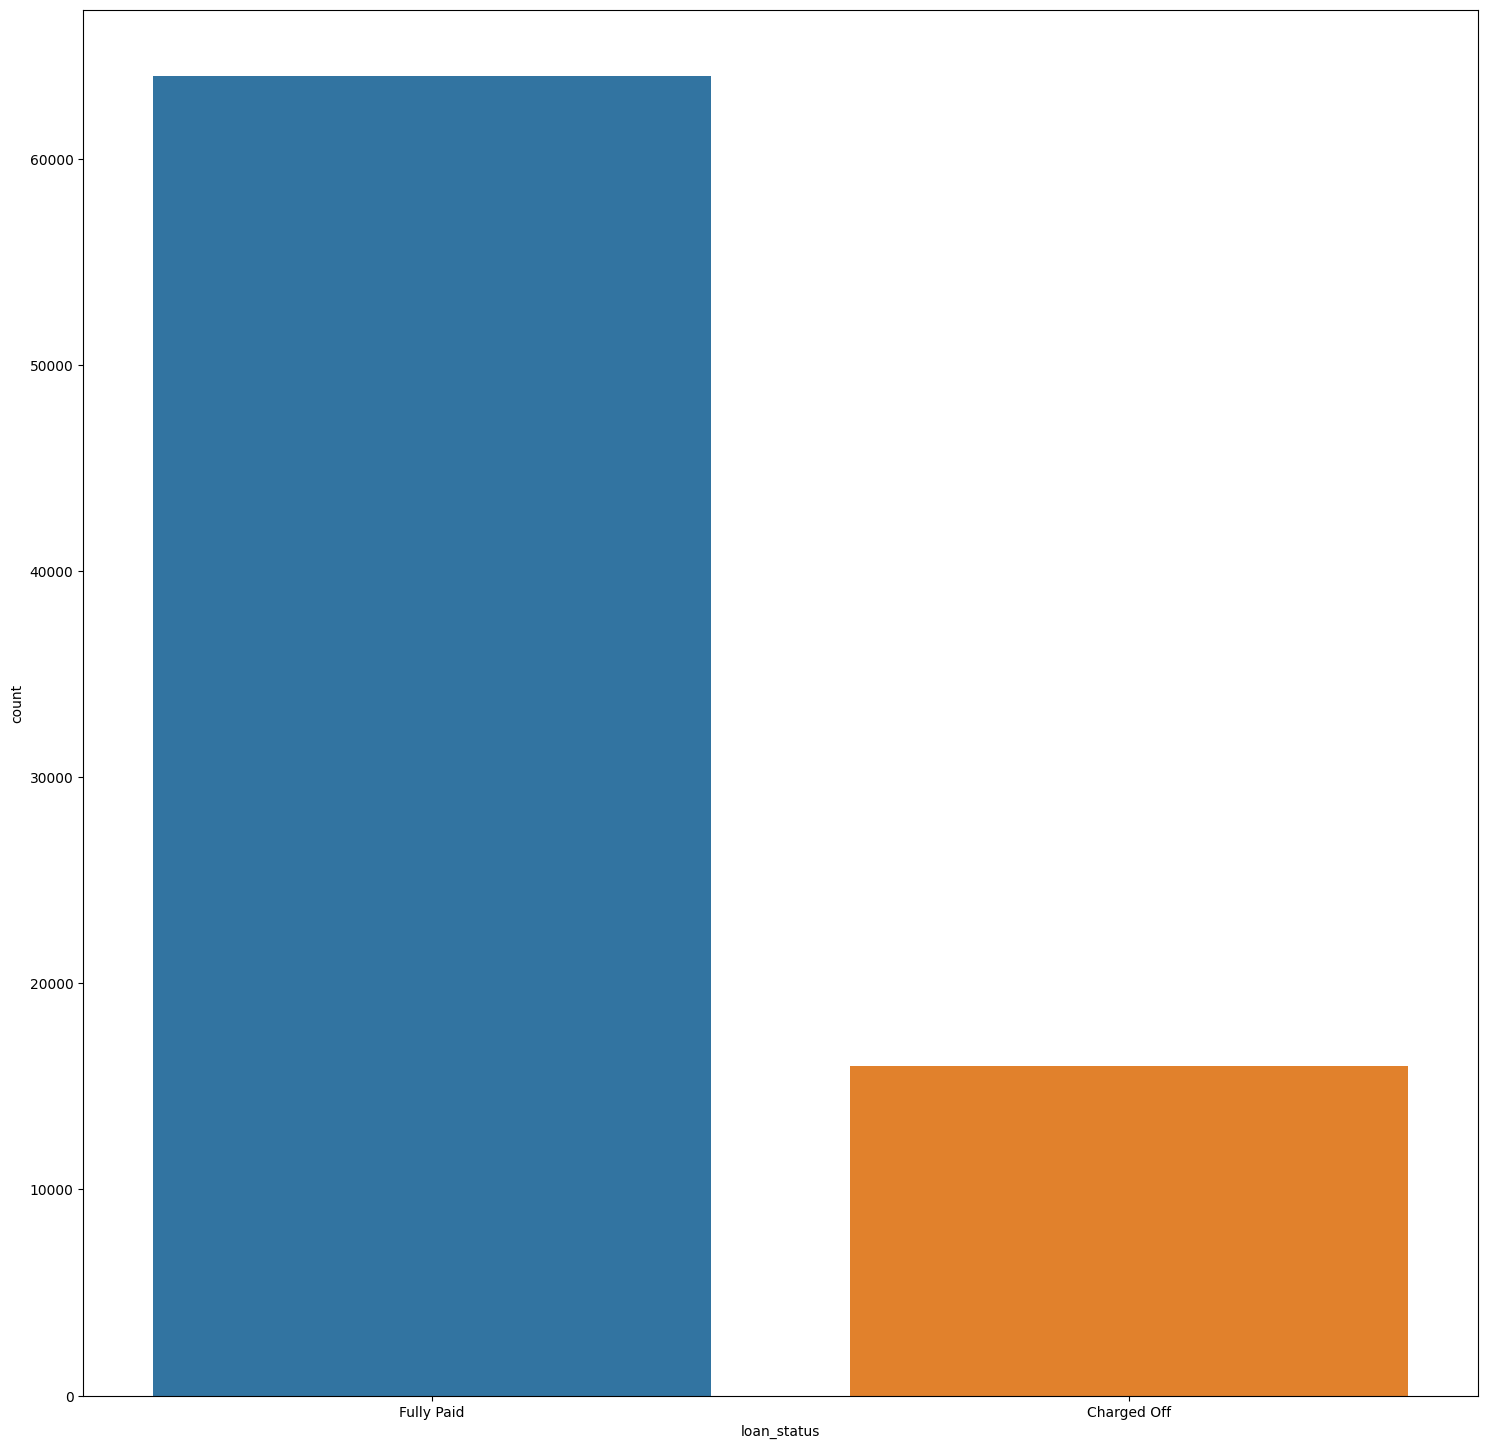

In [ ]:
for col in data.select_dtypes(exclude = np.number).columns:
    print(col)
    plt.figure(figsize=(18,18))
    if col != "title":
      sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.show()

In [ ]:
data.verification_status.unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [ ]:
data.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [ ]:
data.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [ ]:
data.sub_grade.unique()

array(['E1', 'B1', 'B5', 'B2', 'F5', 'D3', 'C1', 'C4', 'B4', 'D4', 'A5',
       'C3', 'C2', 'E4', 'F3', 'E2', 'A1', 'C5', 'B3', 'E5', 'A4', 'D2',
       'F2', 'A2', 'A3', 'F1', 'D5', 'D1', 'E3', 'G2', 'F4', 'G1', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
data.purpose.unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'small_business', 'medical', 'major_purchase', 'car', 'vacation',
       'house', 'moving', 'wedding', 'renewable_energy', 'educational'],
      dtype=object)

In [ ]:
data.application_type.unique()

array(['Individual', 'Joint App'], dtype=object)

In [ ]:
data.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [ ]:
data.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [ ]:
data.grade.unique()

array(['E', 'B', 'F', 'D', 'C', 'A', 'G'], dtype=object)

In [ ]:
data.select_dtypes(exclude=np.number)

addr_state earliest_cr_line emp_length                       emp_title  \
0             CO         Jul-1997  10+ years                          Deputy   
1             CA         Apr-1987  10+ years  Department of Veterans Affairs   
2             FL         Aug-2007  10+ years                Marble polishing   
3             IL         Sep-1980  10+ years                         printer   
4             MD         Jul-1999  10+ years                   Southern Mgmt   
...          ...              ...        ...                             ...   
79995         SC         Feb-2000  10+ years            Sports Group Manager   
79996         NH         Aug-1995  10+ years                    Web Designer   
79997         NY         Apr-2005   < 1 year                 Program Officer   
79998         TX         Apr-1992    3 years            Sr. Business Analyst   
79999         NY         Jun-1999    2 years               Managing Director   

      grade home_ownership application_type initial_list_status  \
0         E       MORTGAGE       Individual                   w   
1         B           RENT       Individual                   w   
2         B       MORTGAGE       Individual                   w   
3         B       MORTGAGE       Individual                   w   
4         F           RENT       Individual                   f   
...     ...            ...              ...                 ...   
79995     G       MORTGAGE       Individual                   w   
79996     C       MORTGAGE       Individual                   w   
79997     B            OWN       Individual                   w   
79998     D       MORTGAGE       Individual                   w   
79999     B       MORTGAGE       Individual                   w   

                  purpose sub_grade        term                    title  \
0      debt_consolidation        E1   60 months       Debt consolidation   
1      debt_consolidation        B1   36 months              Credit Loan   
2      debt_consolidation        B5   36 months       Debt consolidation   
3      debt_consolidation        B2   36 months       Debt consolidation   
4      debt_consolidation        F5   60 months      Debt Connsolidation   
...                   ...       ...         ...                      ...   
79995  debt_consolidation        G3   60 months       Debt consolidation   
79996  debt_consolidation        C1   36 months       Debt consolidation   
79997  debt_consolidation        B4   36 months       Debt consolidation   
79998         credit_card        D5   60 months  Credit card refinancing   
79999  debt_consolidation        B4   36 months       Debt consolidation   

      verification_status  loan_status  
0         Source Verified  Charged Off  
1                Verified   Fully Paid  
2         Source Verified   Fully Paid  
3         Source Verified   Fully Paid  
4                Verified   Fully Paid  
...                   ...          ...  
79995            Verified  Charged Off  
79996        Not Verified   Fully Paid  
79997     Source Verified   Fully Paid  
79998     Source Verified   Fully Paid  
79999     Source Verified   Fully Paid  

[80000 rows x 14 columns]

Handling Missing values

    1.Drop the row
    2.Replace with the statistical properties(Mean, Median and Mode)
    3.Replace with a imputation
    4.Create a new category label

Before dropping any columns are columns analyze how significate these columns to identify credit risk (domain expertise required).
Check for outliers using box plot and Imputation to replace NA's in numerical and categorical column.

In [ ]:
# Employment length in years.
# Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

data.emp_length.unique() # 4588 nulls

array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [ ]:
# The job title supplied by the Borrower when applying for the loan.
data.emp_title.unique() # 5018 nulls

array(['Deputy', 'Department of Veterans Affairs', 'Marble polishing',
       ..., 'COAL MINER', 'repair tec', 'Sports Group Manager'],
      dtype=object)

In [ ]:
# Number of currently active bankcard accounts.
data.num_actv_bc_tl.unique() # 3948 nulls

array([ 1.,  4., 14., nan,  2.,  3.,  6.,  5.,  8.,  0.,  9.,  7., 11.,
       10., 17., 13., 12., 19., 25., 16., 15., 20., 18., 24., 21., 22.,
       26., 27., 32.])

In [ ]:
# Number of mortgage accounts.
data.mort_acc.unique() # 2771 nulls

array([ 1.,  0.,  2.,  7.,  4., nan,  3.,  5.,  8., 12.,  9.,  6., 10.,
       11., 13., 16., 14., 26., 18., 15., 32., 22., 19., 20., 27., 31.,
       17., 24., 29.])

In [ ]:
# Total current balance of all accounts
data.tot_cur_bal.unique() # 3948 nulls

array([ 319479.,   19944.,   23199., ...,  382274.,  201841., 3046776.])

In [ ]:
# Number of public record bankruptcies.
data.pub_rec_bankruptcies.unique() # 31 nulls

array([ 0.,  1.,  2.,  3.,  5., nan,  4.,  7.,  6.])

In [ ]:
# Revolving line utilization rate,
#or the amount of credit the borrower is using relative to all available revolving credit.
data.revol_util.unique() # 53 nulls

array([ 93.6,  60.3,  88.5, ..., 108. , 121.5, 113. ])

In [ ]:
# The loan title provided by the borrower
data.title.unique() # 970 nulls

array(['Debt consolidation', 'Credit Loan', 'Debt Connsolidation', ...,
       'cr card payoff', 'Debt in one place', 'Consolidate 2012'],
      dtype=object)

### Anlayze outliers for the numerical columns to replace missing values with mean or median

<Axes: >

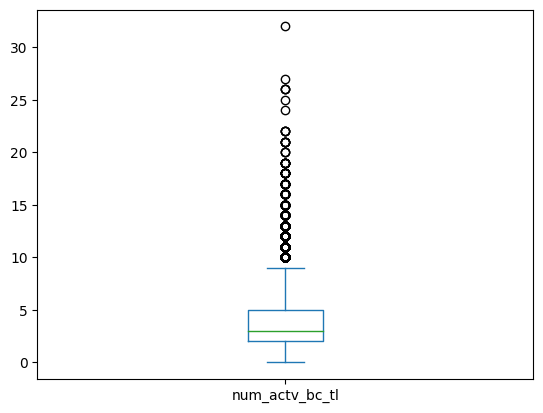

In [ ]:
data['num_actv_bc_tl'].plot(kind= 'box') # Have outliers imputation using median

In [ ]:
data['num_actv_bc_tl'].mean()

3.6337900383947823

In [ ]:
data['num_actv_bc_tl'].median()

3.0

<Axes: >

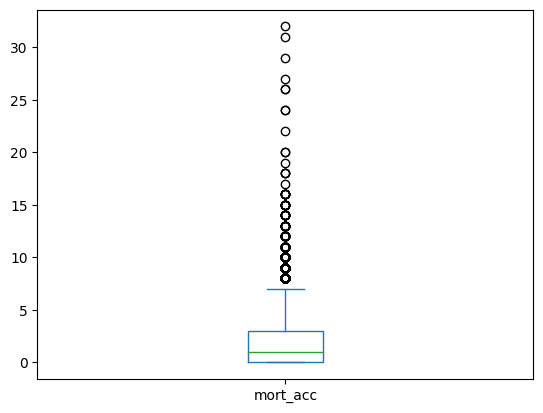

In [ ]:
data['mort_acc'].plot(kind= 'box') # Have outliers imputation using median

In [ ]:
data['mort_acc'].mean()

1.6747594815419078

In [ ]:
data['mort_acc'].median()

1.0

<Axes: >

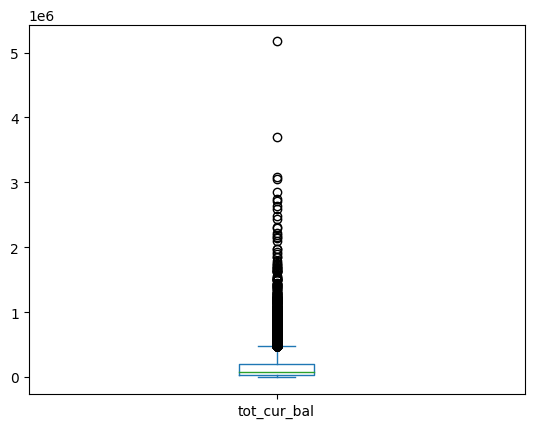

In [ ]:
data.tot_cur_bal.plot(kind= 'box') # Have outliers imputation using median

In [ ]:
data.tot_cur_bal.mean()

141586.35899121655

In [ ]:
data.tot_cur_bal.median()

81000.5

<Axes: >

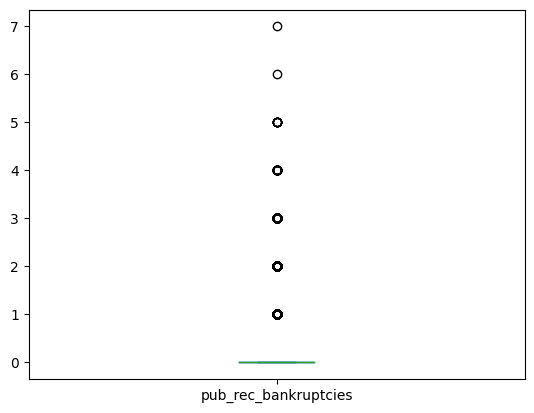

In [ ]:
data.pub_rec_bankruptcies.plot(kind= 'box') # Have outliers imputation using median

In [ ]:
data.pub_rec_bankruptcies.mean()

0.1371031274618915

In [ ]:
data.pub_rec_bankruptcies.median()

0.0

<Axes: >

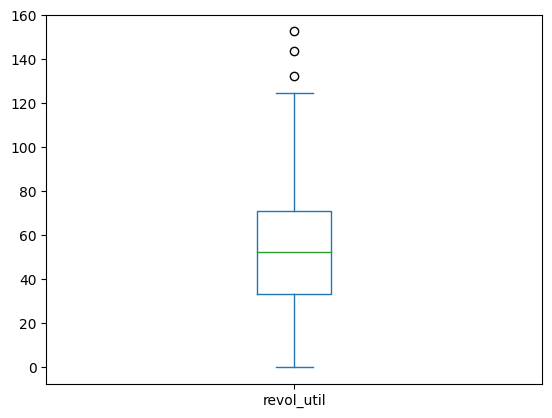

In [ ]:
data.revol_util.plot(kind= 'box') # Have outliers imputation using median

In [ ]:
data.revol_util.mean()

51.89914230677824

In [ ]:
data.revol_util.median()

52.2

## split data to numeric and categorical


### Numerical data analysis along with imputation to fill na's and minmax encoding to Standardize the data.

In [49]:
numerical_data = data.select_dtypes(include=np.number)

In [50]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            39996 non-null  float64
 1   fico_range_high       39996 non-null  float64
 2   fico_range_low        39996 non-null  float64
 3   int_rate              39996 non-null  float64
 4   loan_amnt             39996 non-null  float64
 5   num_actv_bc_tl        38029 non-null  float64
 6   mort_acc              38617 non-null  float64
 7   tot_cur_bal           38029 non-null  float64
 8   open_acc              39996 non-null  float64
 9   pub_rec               39996 non-null  float64
 10  pub_rec_bankruptcies  39979 non-null  float64
 11  revol_bal             39996 non-null  float64
 12  revol_util            39972 non-null  float64
 13  total_acc             39996 non-null  float64
dtypes: float64(14)
memory usage: 4.3 MB


In [51]:
numerical_data

annual_inc  fico_range_high  fico_range_low  int_rate  loan_amnt  \
0         85000.0            744.0           740.0     18.99    18075.0   
1         40000.0            724.0           720.0     10.16     8800.0   
2         60000.0            679.0           675.0     11.47    18000.0   
3        100742.0            664.0           660.0      9.16    20000.0   
4         80000.0            669.0           665.0     23.83    35000.0   
...           ...              ...             ...       ...        ...   
39991     48000.0            674.0           670.0     20.20    20125.0   
39992    120000.0            769.0           765.0     10.49    35000.0   
39993     40000.0            724.0           720.0     11.49    17375.0   
39994     42000.0            729.0           725.0      8.18     9975.0   
39995     25000.0            664.0           660.0     14.65     8700.0   

       num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0                 1.0       1.0     319479.0       7.0      0.0   
1                 4.0       0.0      19944.0       5.0      0.0   
2                 4.0       2.0      23199.0       7.0      0.0   
3                 4.0       1.0      72651.0      12.0      0.0   
4                14.0       7.0      64631.0      23.0      0.0   
...               ...       ...          ...       ...      ...   
39991             4.0       2.0      41663.0       9.0      0.0   
39992             3.0       4.0     621372.0      11.0      0.0   
39993             2.0       0.0      12938.0       6.0      0.0   
39994             4.0       4.0     252353.0      11.0      0.0   
39995             2.0       0.0      44562.0      22.0      0.0   

       pub_rec_bankruptcies  revol_bal  revol_util  total_acc  
0                       0.0     5338.0        93.6        8.0  
1                       0.0    19944.0        60.3       12.0  
2                       0.0    23199.0        88.5       16.0  
3                       0.0    18425.0        69.0       19.0  
4                       0.0    34370.0        90.0       59.0  
...                     ...        ...         ...        ...  
39991                   0.0    28836.0        69.0       30.0  
39992                   0.0    26703.0        15.6       37.0  
39993                   0.0     4946.0        60.3       14.0  
39994                   0.0    15673.0        47.6       27.0  
39995                   0.0     3132.0        31.3       43.0  

[39996 rows x 14 columns]

In [52]:
numerical_data.isna().sum()

annual_inc                 0
fico_range_high            0
fico_range_low             0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1967
mort_acc                1379
tot_cur_bal             1967
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      17
revol_bal                  0
revol_util                24
total_acc                  0
dtype: int64

In [53]:
clone_numerical_data = numerical_data.copy()

In [54]:
numerical_data.columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

### Imputation on Numerical columns

In [55]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(clone_numerical_data[numerical_data.columns])
imputed_numerical_data = imputer.fit_transform(clone_numerical_data[numerical_data.columns])

In [56]:
imputed_numerical_data

array([[8.5000e+04, 7.4400e+02, 7.4000e+02, ..., 5.3380e+03, 9.3600e+01,
        8.0000e+00],
       [4.0000e+04, 7.2400e+02, 7.2000e+02, ..., 1.9944e+04, 6.0300e+01,
        1.2000e+01],
       [6.0000e+04, 6.7900e+02, 6.7500e+02, ..., 2.3199e+04, 8.8500e+01,
        1.6000e+01],
       ...,
       [4.0000e+04, 7.2400e+02, 7.2000e+02, ..., 4.9460e+03, 6.0300e+01,
        1.4000e+01],
       [4.2000e+04, 7.2900e+02, 7.2500e+02, ..., 1.5673e+04, 4.7600e+01,
        2.7000e+01],
       [2.5000e+04, 6.6400e+02, 6.6000e+02, ..., 3.1320e+03, 3.1300e+01,
        4.3000e+01]])

In [57]:
imputed_numerical_dataframe = pd.DataFrame(imputed_numerical_data,columns=numerical_data.columns)

In [58]:
imputed_numerical_dataframe

annual_inc  fico_range_high  fico_range_low  int_rate  loan_amnt  \
0         85000.0            744.0           740.0     18.99    18075.0   
1         40000.0            724.0           720.0     10.16     8800.0   
2         60000.0            679.0           675.0     11.47    18000.0   
3        100742.0            664.0           660.0      9.16    20000.0   
4         80000.0            669.0           665.0     23.83    35000.0   
...           ...              ...             ...       ...        ...   
39991     48000.0            674.0           670.0     20.20    20125.0   
39992    120000.0            769.0           765.0     10.49    35000.0   
39993     40000.0            724.0           720.0     11.49    17375.0   
39994     42000.0            729.0           725.0      8.18     9975.0   
39995     25000.0            664.0           660.0     14.65     8700.0   

       num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0                 1.0       1.0     319479.0       7.0      0.0   
1                 4.0       0.0      19944.0       5.0      0.0   
2                 4.0       2.0      23199.0       7.0      0.0   
3                 4.0       1.0      72651.0      12.0      0.0   
4                14.0       7.0      64631.0      23.0      0.0   
...               ...       ...          ...       ...      ...   
39991             4.0       2.0      41663.0       9.0      0.0   
39992             3.0       4.0     621372.0      11.0      0.0   
39993             2.0       0.0      12938.0       6.0      0.0   
39994             4.0       4.0     252353.0      11.0      0.0   
39995             2.0       0.0      44562.0      22.0      0.0   

       pub_rec_bankruptcies  revol_bal  revol_util  total_acc  
0                       0.0     5338.0        93.6        8.0  
1                       0.0    19944.0        60.3       12.0  
2                       0.0    23199.0        88.5       16.0  
3                       0.0    18425.0        69.0       19.0  
4                       0.0    34370.0        90.0       59.0  
...                     ...        ...         ...        ...  
39991                   0.0    28836.0        69.0       30.0  
39992                   0.0    26703.0        15.6       37.0  
39993                   0.0     4946.0        60.3       14.0  
39994                   0.0    15673.0        47.6       27.0  
39995                   0.0     3132.0        31.3       43.0  

[39996 rows x 14 columns]

In [59]:
imputed_numerical_dataframe.info() ### removed all the na values
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            39996 non-null  float64
 1   fico_range_high       39996 non-null  float64
 2   fico_range_low        39996 non-null  float64
 3   int_rate              39996 non-null  float64
 4   loan_amnt             39996 non-null  float64
 5   num_actv_bc_tl        39996 non-null  float64
 6   mort_acc              39996 non-null  float64
 7   tot_cur_bal           39996 non-null  float64
 8   open_acc              39996 non-null  float64
 9   pub_rec               39996 non-null  float64
 10  pub_rec_bankruptcies  39996 non-null  float64
 11  revol_bal             39996 non-null  float64
 12  revol_util            39996 non-null  float64
 13  total_acc             39996 non-null  float64
dtypes: float64(14)
memory usage: 4.3 MB
<class 'pandas.core.frame.DataFram

In [60]:
imputed_numerical_dataframe.isna().sum() # verify any na values in numerical columns

annual_inc              0
fico_range_high         0
fico_range_low          0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
revol_bal               0
revol_util              0
total_acc               0
dtype: int64

In [61]:
minnax = MinMaxScaler()

In [62]:
numerical_encode_data = minnax.fit_transform(imputed_numerical_dataframe)

In [63]:
numerical_encoded_dataframe = pd.DataFrame(numerical_encode_data, columns=numerical_data.columns) #columns=categorical_encode_data_columns

In [64]:
numerical_encoded_dataframe

annual_inc  fico_range_high  fico_range_low  int_rate  loan_amnt  \
0        0.012145         0.430108        0.432432  0.532710   0.439258   
1        0.005715         0.322581        0.324324  0.188863   0.202046   
2        0.008573         0.080645        0.081081  0.239875   0.437340   
3        0.014394         0.000000        0.000000  0.149922   0.488491   
4        0.011431         0.026882        0.027027  0.721184   0.872123   
...           ...              ...             ...       ...        ...   
39991    0.006858         0.053763        0.054054  0.579829   0.491688   
39992    0.017146         0.564516        0.567568  0.201713   0.872123   
39993    0.005715         0.322581        0.324324  0.240654   0.421355   
39994    0.006001         0.349462        0.351351  0.111760   0.232097   
39995    0.003572         0.000000        0.000000  0.363707   0.199488   

       num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0            0.038462   0.03125     0.061769  0.089552      0.0   
1            0.153846   0.00000     0.003856  0.059701      0.0   
2            0.153846   0.06250     0.004485  0.089552      0.0   
3            0.153846   0.03125     0.014046  0.164179      0.0   
4            0.538462   0.21875     0.012496  0.328358      0.0   
...               ...       ...          ...       ...      ...   
39991        0.153846   0.06250     0.008055  0.119403      0.0   
39992        0.115385   0.12500     0.120137  0.149254      0.0   
39993        0.076923   0.00000     0.002501  0.074627      0.0   
39994        0.153846   0.12500     0.048790  0.149254      0.0   
39995        0.076923   0.00000     0.008616  0.313433      0.0   

       pub_rec_bankruptcies  revol_bal  revol_util  total_acc  
0                       0.0   0.006256    0.651811    0.03750  
1                       0.0   0.023375    0.419916    0.06250  
2                       0.0   0.027190    0.616295    0.08750  
3                       0.0   0.021595    0.480501    0.10625  
4                       0.0   0.040283    0.626741    0.35625  
...                     ...        ...         ...        ...  
39991                   0.0   0.033797    0.480501    0.17500  
39992                   0.0   0.031297    0.108635    0.21875  
39993                   0.0   0.005797    0.419916    0.07500  
39994                   0.0   0.018370    0.331476    0.15625  
39995                   0.0   0.003671    0.217967    0.25625  

[39996 rows x 14 columns]

In [65]:
### categorical data analysis along with imputation to fill na's and onehot encoding to Standardize the data.

In [66]:
categorical_data = data.select_dtypes(exclude = np.number)

In [67]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   addr_state           39996 non-null  object
 1   earliest_cr_line     39996 non-null  object
 2   emp_length           37707 non-null  object
 3   emp_title            37512 non-null  object
 4   grade                39996 non-null  object
 5   home_ownership       39996 non-null  object
 6   application_type     39996 non-null  object
 7   initial_list_status  39996 non-null  object
 8   purpose              39996 non-null  object
 9   sub_grade            39996 non-null  object
 10  term                 39996 non-null  object
 11  title                39519 non-null  object
 12  verification_status  39996 non-null  object
 13  loan_status          39995 non-null  object
dtypes: object(14)
memory usage: 4.3+ MB


In [68]:
categorical_data.isna().sum()

addr_state                0
earliest_cr_line          0
emp_length             2289
emp_title              2484
grade                     0
home_ownership            0
application_type          0
initial_list_status       0
purpose                   0
sub_grade                 0
term                      0
title                   477
verification_status       0
loan_status               1
dtype: int64

In [69]:
clone_categorical_data = categorical_data.copy()

In [70]:
categorical_data.columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [71]:
imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')
imputer.fit(clone_categorical_data[['emp_length','emp_title','title']])
imputed_categorical_data = imputer.fit_transform(clone_categorical_data[categorical_data.columns])

In [72]:
imputed_categorical_data

array([['CO', 'Jul-1997', '10+ years', ..., 'Debt consolidation',
        'Source Verified', 'Charged Off'],
       ['CA', 'Apr-1987', '10+ years', ..., 'Credit Loan', 'Verified',
        'Fully Paid'],
       ['FL', 'Aug-2007', '10+ years', ..., 'Debt consolidation',
        'Source Verified', 'Fully Paid'],
       ...,
       ['UT', 'Jan-2007', '4 years', ..., 'Debt consolidation',
        'Source Verified', 'Charged Off'],
       ['VT', 'Jun-1985', '10+ years', ..., 'Credit card refinancing',
        'Not Verified', 'Fully Paid'],
       ['KY', 'Apr-2007', '1 year', ..., 'Credit card refinancing',
        'Not Ver', 'Fully Paid']], dtype=object)

In [73]:
imputed_categorical_dataframe = pd.DataFrame(imputed_categorical_data,columns=categorical_data.columns)

In [74]:
imputed_categorical_dataframe

addr_state earliest_cr_line emp_length                       emp_title  \
0             CO         Jul-1997  10+ years                          Deputy   
1             CA         Apr-1987  10+ years  Department of Veterans Affairs   
2             FL         Aug-2007  10+ years                Marble polishing   
3             IL         Sep-1980  10+ years                         printer   
4             MD         Jul-1999  10+ years                   Southern Mgmt   
...          ...              ...        ...                             ...   
39991         TX         Nov-1995    4 years                             SSR   
39992         HI         Apr-2000  10+ years                             CTO   
39993         UT         Jan-2007    4 years                Escrow Assistant   
39994         VT         Jun-1985  10+ years       Quality Assurance Manager   
39995         KY         Apr-2007     1 year                 Factory worker    

      grade home_ownership application_type initial_list_status  \
0         E       MORTGAGE       Individual                   w   
1         B           RENT       Individual                   w   
2         B       MORTGAGE       Individual                   w   
3         B       MORTGAGE       Individual                   w   
4         F           RENT       Individual                   f   
...     ...            ...              ...                 ...   
39991     E           RENT       Individual                   w   
39992     B       MORTGAGE       Individual                   w   
39993     B            OWN       Individual                   w   
39994     B            OWN       Individual                   w   
39995     C       MORTGAGE       Individual                   f   

                  purpose sub_grade        term                    title  \
0      debt_consolidation        E1   60 months       Debt consolidation   
1      debt_consolidation        B1   36 months              Credit Loan   
2      debt_consolidation        B5   36 months       Debt consolidation   
3      debt_consolidation        B2   36 months       Debt consolidation   
4      debt_consolidation        F5   60 months      Debt Connsolidation   
...                   ...       ...         ...                      ...   
39991         credit_card        E3   60 months  Credit card refinancing   
39992  debt_consolidation        B2   36 months       Debt consolidation   
39993  debt_consolidation        B5   36 months       Debt consolidation   
39994         credit_card        B1   36 months  Credit card refinancing   
39995         credit_card        C5   36 months  Credit card refinancing   

      verification_status  loan_status  
0         Source Verified  Charged Off  
1                Verified   Fully Paid  
2         Source Verified   Fully Paid  
3         Source Verified   Fully Paid  
4                Verified   Fully Paid  
...                   ...          ...  
39991     Source Verified   Fully Paid  
39992     Source Verified   Fully Paid  
39993     Source Verified  Charged Off  
39994        Not Verified   Fully Paid  
39995             Not Ver   Fully Paid  

[39996 rows x 14 columns]

In [75]:
imputed_categorical_dataframe

addr_state earliest_cr_line emp_length                       emp_title  \
0             CO         Jul-1997  10+ years                          Deputy   
1             CA         Apr-1987  10+ years  Department of Veterans Affairs   
2             FL         Aug-2007  10+ years                Marble polishing   
3             IL         Sep-1980  10+ years                         printer   
4             MD         Jul-1999  10+ years                   Southern Mgmt   
...          ...              ...        ...                             ...   
39991         TX         Nov-1995    4 years                             SSR   
39992         HI         Apr-2000  10+ years                             CTO   
39993         UT         Jan-2007    4 years                Escrow Assistant   
39994         VT         Jun-1985  10+ years       Quality Assurance Manager   
39995         KY         Apr-2007     1 year                 Factory worker    

      grade home_ownership application_type initial_list_status  \
0         E       MORTGAGE       Individual                   w   
1         B           RENT       Individual                   w   
2         B       MORTGAGE       Individual                   w   
3         B       MORTGAGE       Individual                   w   
4         F           RENT       Individual                   f   
...     ...            ...              ...                 ...   
39991     E           RENT       Individual                   w   
39992     B       MORTGAGE       Individual                   w   
39993     B            OWN       Individual                   w   
39994     B            OWN       Individual                   w   
39995     C       MORTGAGE       Individual                   f   

                  purpose sub_grade        term                    title  \
0      debt_consolidation        E1   60 months       Debt consolidation   
1      debt_consolidation        B1   36 months              Credit Loan   
2      debt_consolidation        B5   36 months       Debt consolidation   
3      debt_consolidation        B2   36 months       Debt consolidation   
4      debt_consolidation        F5   60 months      Debt Connsolidation   
...                   ...       ...         ...                      ...   
39991         credit_card        E3   60 months  Credit card refinancing   
39992  debt_consolidation        B2   36 months       Debt consolidation   
39993  debt_consolidation        B5   36 months       Debt consolidation   
39994         credit_card        B1   36 months  Credit card refinancing   
39995         credit_card        C5   36 months  Credit card refinancing   

      verification_status  loan_status  
0         Source Verified  Charged Off  
1                Verified   Fully Paid  
2         Source Verified   Fully Paid  
3         Source Verified   Fully Paid  
4                Verified   Fully Paid  
...                   ...          ...  
39991     Source Verified   Fully Paid  
39992     Source Verified   Fully Paid  
39993     Source Verified  Charged Off  
39994        Not Verified   Fully Paid  
39995             Not Ver   Fully Paid  

[39996 rows x 14 columns]

In [76]:
imputed_categorical_dataframe.info()
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   addr_state           39996 non-null  object
 1   earliest_cr_line     39996 non-null  object
 2   emp_length           39996 non-null  object
 3   emp_title            39996 non-null  object
 4   grade                39996 non-null  object
 5   home_ownership       39996 non-null  object
 6   application_type     39996 non-null  object
 7   initial_list_status  39996 non-null  object
 8   purpose              39996 non-null  object
 9   sub_grade            39996 non-null  object
 10  term                 39996 non-null  object
 11  title                39996 non-null  object
 12  verification_status  39996 non-null  object
 13  loan_status          39996 non-null  object
dtypes: object(14)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0

In [77]:
imputed_categorical_dataframe.isna().sum() # verify categorical columns has no Na's

addr_state             0
earliest_cr_line       0
emp_length             0
emp_title              0
grade                  0
home_ownership         0
application_type       0
initial_list_status    0
purpose                0
sub_grade              0
term                   0
title                  0
verification_status    0
loan_status            0
dtype: int64

### Encoding

In [78]:
onehotencoder = OneHotEncoder(sparse=False, categories='auto')

In [79]:
categorical_encode_data = onehotencoder.fit_transform(imputed_categorical_dataframe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
categorical_encode_data

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [81]:
categorical_encode_data_columns = onehotencoder.get_feature_names_out()

In [82]:
categorical_encode_data_columns

array(['addr_state_AK', 'addr_state_AL', 'addr_state_AR', ...,
       'verification_status_Verified', 'loan_status_Charged Off',
       'loan_status_Fully Paid'], dtype=object)

In [83]:
categorical_encoded_dataframe = pd.DataFrame(categorical_encode_data, columns=categorical_encode_data_columns)

In [84]:
categorical_encoded_dataframe

addr_state_AK  addr_state_AL  addr_state_AR  addr_state_AZ  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
39991            0.0            0.0            0.0            0.0   
39992            0.0            0.0            0.0            0.0   
39993            0.0            0.0            0.0            0.0   
39994            0.0            0.0            0.0            0.0   
39995            0.0            0.0            0.0            0.0   

       addr_state_CA  addr_state_CO  addr_state_CT  addr_state_DC  \
0                0.0            1.0            0.0            0.0   
1                1.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
39991            0.0            0.0            0.0            0.0   
39992            0.0            0.0            0.0            0.0   
39993            0.0            0.0            0.0            0.0   
39994            0.0            0.0            0.0            0.0   
39995            0.0            0.0            0.0            0.0   

       addr_state_DE  addr_state_FL  ...  title_wood floor  title_work tool  \
0                0.0            0.0  ...               0.0              0.0   
1                0.0            0.0  ...               0.0              0.0   
2                0.0            1.0  ...               0.0              0.0   
3                0.0            0.0  ...               0.0              0.0   
4                0.0            0.0  ...               0.0              0.0   
...              ...            ...  ...               ...              ...   
39991            0.0            0.0  ...               0.0              0.0   
39992            0.0            0.0  ...               0.0              0.0   
39993            0.0            0.0  ...               0.0              0.0   
39994            0.0            0.0  ...               0.0              0.0   
39995            0.0            0.0  ...               0.0              0.0   

       title_wrap up   title_yes to refinance  verification_status_Not Ver  \
0                 0.0                     0.0                          0.0   
1                 0.0                     0.0                          0.0   
2                 0.0                     0.0                          0.0   
3                 0.0                     0.0                          0.0   
4                 0.0                     0.0                          0.0   
...               ...                     ...                          ...   
39991             0.0                     0.0                          0.0   
39992             0.0                     0.0                          0.0   
39993             0.0                     0.0                          0.0   
39994             0.0                     0.0                          0.0   
39995             0.0                     0.0                          1.0   

       verification_status_Not Verified  verification_status_Source Verified  \
0                                   0.0                                  1.0   
1                                   0.0                                  0.0   
2                                   0.0                                  1.0   
3                                   0.0                                  1.0   
4                                   0.0                        

In [85]:
# class CustomTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self,strategy):
#         self.strategy = strategy

#     def fit(self, X):
#         self.imputer = SimpleImputer(missing_values=np.nan, strategy=self.strategy)
#         self.imputer.fit(X)
#         return self

#     def transform(self, X):
#         return self.imputer.transform(X)


### 4. Imputation  5. Standardization  6. Encodings

In [228]:
numerical_imputer = Pipeline([
    ('imputation', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_imputer = Pipeline([
    ('imputation', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [229]:
preprocess_full = ColumnTransformer(
    transformers=
    [
        ('numerical_preprocessing',numerical_imputer,['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc']),
        ('categorical_preprocessing',categorical_imputer,['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status'])
    ]
)


In [230]:
#['emp_length','emp_title','title']

In [231]:
numerical_data.columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [233]:
categorical_data.columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

### 7. Pipeline

In [234]:
pipe = Pipeline([
         ('preprocess',preprocess_full),
         ('model',LogisticRegression(solver='lbfgs', max_iter=1000))
      ])

### 8. Models

In [235]:
from sklearn import set_config
set_config(display='diagram')
display(pipe)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc',
                                                   'fico_range_high',
                                                   'fico_range_low', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'tot...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['addr_state',
                                                   'earliest_cr_line',
                                                   'emp_length', 'emp_title',
                                                   'grade', 'home_ownership',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'purpose', 'sub_grade',
                                                   'term', 'title',
                                                   'verification_status'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [218]:
datafile = "./data/train_loan_data.csv"
chunksize = 2222

In [113]:
TextFileReader = pd.read_csv(datafile, chunksize=chunksize)


In [114]:
TextFileReader

In [ ]:
for data in TextFileReader:
    print(data)
    break

In [ ]:
data_chunks_df = TextFileReader.get_chunk(2222)

for chunk in data_chunks_df:
    print(chunk)

In [117]:
type(data_chunks_df)

pandas.core.frame.DataFrame

In [119]:
df= pd.DataFrame(TextFileReader.get_chunk(2222))

In [176]:
type(df)

pandas.core.frame.DataFrame

## Incrementally train a model on the data of each chunk

In [220]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc',
                                                   'fico_range_high',
                                                   'fico_range_low', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'revol_bal', 'revol_util',
                                                   'tot...
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['addr_state',
                                                   'earliest_cr_line',
                                                   'emp_length', 'emp_title',
                                                   'grade', 'home_ownership',
                                                   'application_type',
                                                   'initial_list_status',
                                                   'purpose', 'sub_grade',
                                                   'term', 'title',
                                                   'verification_status'])])),
                ('model', LogisticRegression())])

In [237]:
def train_model_incrementally(chunk):
  # index = 1
  X = pd.DataFrame()
  y = pd.DataFrame()
  X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
  models = []
  for chunk in pd.read_csv(datafile, chunksize=chunksize):
    # print(index,type(chunk))
    # index += 1

    X = chunk.drop(columns='loan_status')
    y = chunk['loan_status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
    pipe.fit(X_train,y_train)
    models.append(pipe)

    # print(pipe.get_feature_names_out)
  return models

    # train_pred = pipe.predict(X_train)
    # print(train_pred)
    # test_pred = pipe.predict(X_test)
    # print(test_pred)

In [238]:
models = train_model_incrementally(chunk) #https://forecastegy.com/posts/how-to-solve-logistic-regression-not-converging-in-scikit-learn/ for the warning Increase the number of iterations (max_iter) or scale the data as shown in

In [245]:
from numpy.core.fromnumeric import mean
predictions = [model.predict(data.drop(columns='loan_status')) for model in models]

In [247]:
for model in models:
  print(model)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['annual_inc',
                                                   'fico_range_high',
                                                   'fico_range_low', 'int_rate',
                                                   'loan_amnt',
                                                   'num_actv_bc_tl', 'mort_acc',
                                                   'tot_cur_bal', 'open_acc',
                                                   'pub_rec',
                                                   'pub_rec_ban

In [241]:
predictions

[array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
        'Fully Paid', 'Fully Paid'], dtype=object),
 array(['Charged Off', '

In [163]:
train_pred = pipe.predict(X_train)

In [164]:
print(train_pred)

['Fully Paid' 'Fully Paid' 'Fully Paid' ... 'Fully Paid' 'Fully Paid'
 'Fully Paid']


In [165]:
test_pred = pipe.predict(X_test)

In [ ]:
print(test_pred)

In [92]:
X = data.drop(columns='loan_status')

In [93]:
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
y_train

64252    Fully Paid
6991     Fully Paid
18921    Fully Paid
30278    Fully Paid
73171    Fully Paid
            ...    
44295    Fully Paid
33867    Fully Paid
31019    Fully Paid
44566    Fully Paid
72173    Fully Paid
Name: loan_status, Length: 56000, dtype: object

In [ ]:
test = numerical_encoded_dataframe + categorical_encoded_dataframe

In [ ]:
newdata = pd.concat([numerical_encoded_dataframe,categorical_encoded_dataframe], axis = 1)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
filled = preprocess_full.fit(categorical_encoded_dataframe)

In [ ]:
pipe

In [ ]:




filled = preprocess_full.fit_transform(data)

filled

pd.DataFrame(filled,columns=data.columns).info()

pd.DataFrame(filled,columns=data.columns).info()

data.columns





categorical_data









imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = imputer.fit_transform(clonedata)

df